In [1]:
import pandas as pd
import requests
import os
from __sdss__ import *

In [2]:
path_to_broads = r'E:\backup\backup_BPT\Sep2023\BROAD\broads_ha.csv'
frame = pd.read_csv(path_to_broads, usecols=['SPECID'])

path_to_base = r'E:\databases\GAMAforOleg.txt'
gen_frame = pd.read_csv(path_to_base, sep='\s+', engine='python', usecols=['SPECID', 'URL_PNG'])

# final_frame = pd.merge(frame, gen_frame, on='SPECID', how='inner')

final_frame = frame.loc[frame.SPECID.str.contains('G') == True]
print(final_frame.info)

<bound method DataFrame.info of              SPECID
125  G09_Y1_AN1_176
126  G09_Y1_BN1_307
127  G09_Y1_BN2_106
128  G09_Y1_BN2_306
129  G09_Y1_BS2_044
..              ...
210  G15_Y3_042_036
211  G15_Y4_206_141
212  G15_Y4_217_134
213  G15_Y5_029_255
214  G15_Y6_101_329

[90 rows x 1 columns]>


In [3]:
# os.chdir(r'E:\databases\SDSS\GAMA_SPECTRA_PNG')
# for ids in final_frame['SPECID']:
#     url = 'https://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/'+ids+'.png'
#     r = requests.get(url, allow_redirects=True)
#     filename = url.split('/')[-1]
#     open(filename, 'wb').write(r.content)

In [4]:
# os.chdir(r'E:\databases\SDSS\GAMA_SPECTRA_FIT')
# for ids in final_frame['SPECID']:
#     url = 'https://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/'+ids+'.fit'
#     r = requests.get(url, allow_redirects=True)
#     filename = url.split('/')[-1]
#     open(filename, 'wb').write(r.content)

TESTING FITS READING OF GAMA FIT FILES

In [5]:
from astropy.io import fits

(4952,)


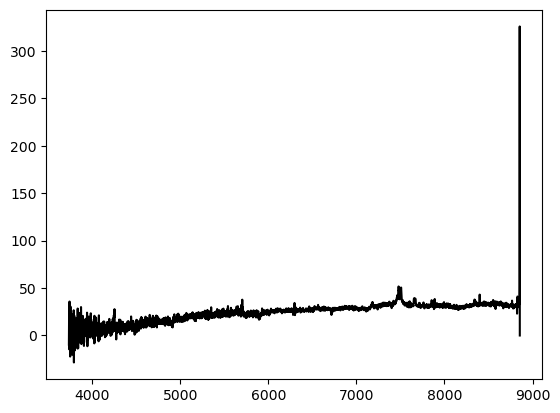

In [6]:
path_to_test_1 = r"E:\databases\SDSS\GAMA_SPECTRA_FIT\G09_Y1_AN1_176.fit"
path_to_test_2 = r"E:\databases\SDSS\GAMA_SPECTRA_FIT\G09_Y1_BN1_307.fit"
path_to_test_3 = r"E:\databases\SDSS\GAMA_SPECTRA_FIT\G09_Y1_FS2_173.fit"
path_to_test_4 = r"E:\databases\SDSS\GAMA_SPECTRA_FIT\G09_Y1_HS2_257.fit"   
path_to_test_5 = r"E:\databases\SDSS\GAMA_SPECTRA_FIT\G15_Y1_IS1_201.fit"
pathes = [path_to_test_1]

for path in pathes:
    hdul = fits.open(path)
    # hdul.info()
    hdu = hdul[0]
    wavelength = np.linspace(3727.79, 8856.73, 4952)
    plt.plot(wavelength, hdu.data[0,:], color='black')
    print(hdu.data[0,:].shape)
    # print(hdu.header)
    # print(hdul[0].header)

e:\backup\backup_BPT\Sep2023\SDSS_Spectra\__sdss__.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(output_path, dpi=70, bbox_inches = 'tight', pad_inches = 0.0001)
e:\backup\backup_BPT\Sep2023\SDSS_Spectra\__sdss__.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(12,6), tight_layout=True)
c:\Users\ALEZHA_ACTIVE\Anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
c:\Users\ALEZHA_ACTIVE\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure i

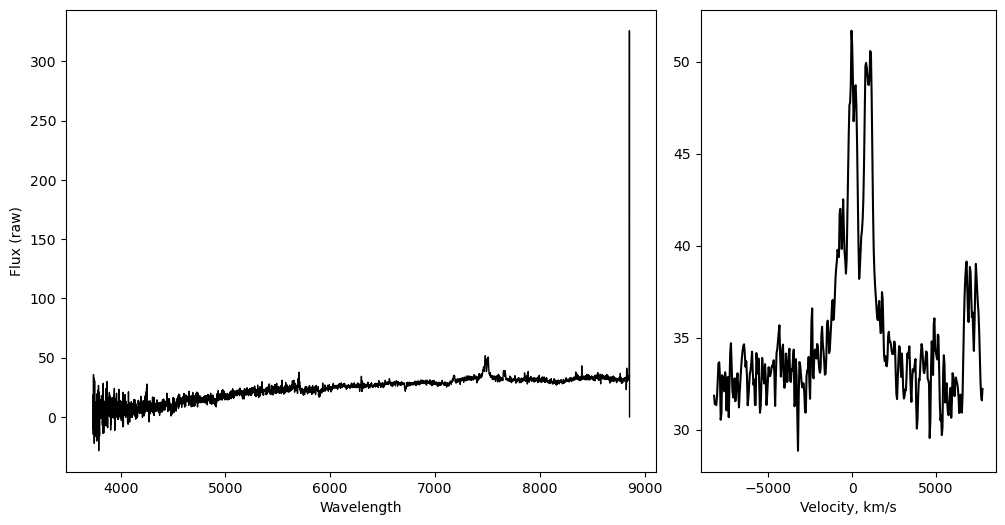

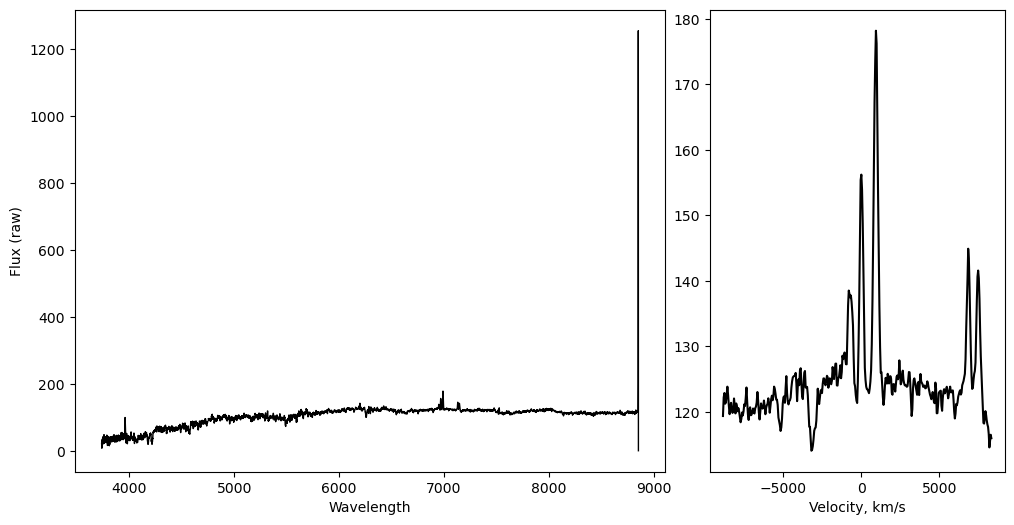

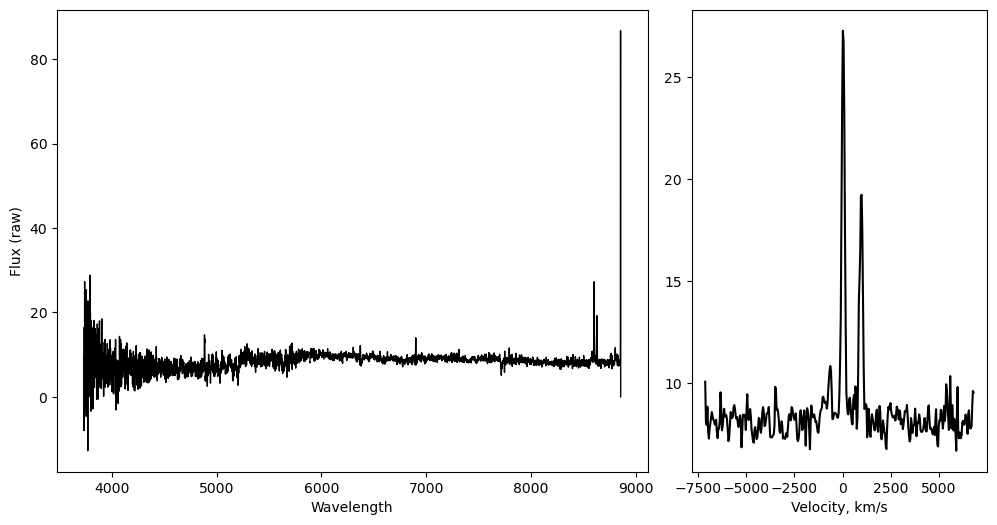

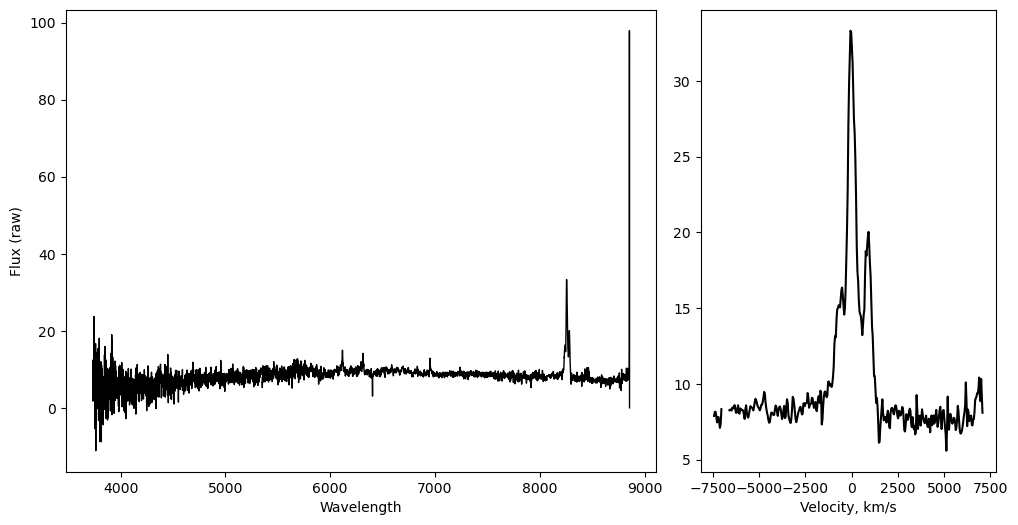

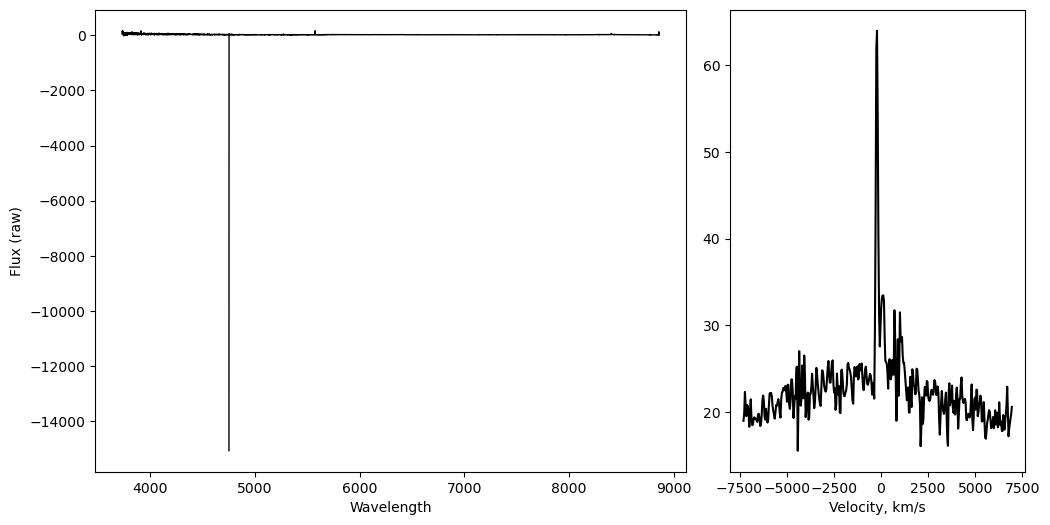

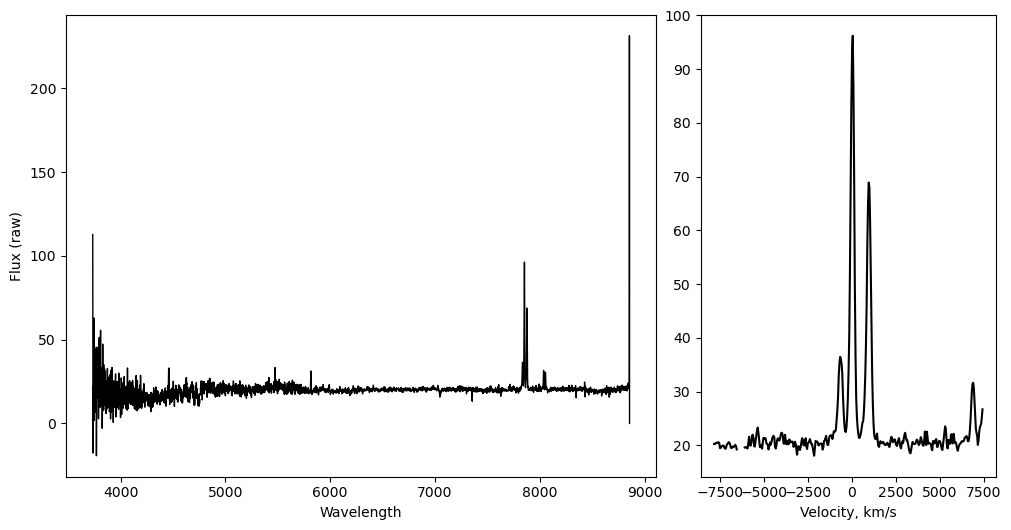

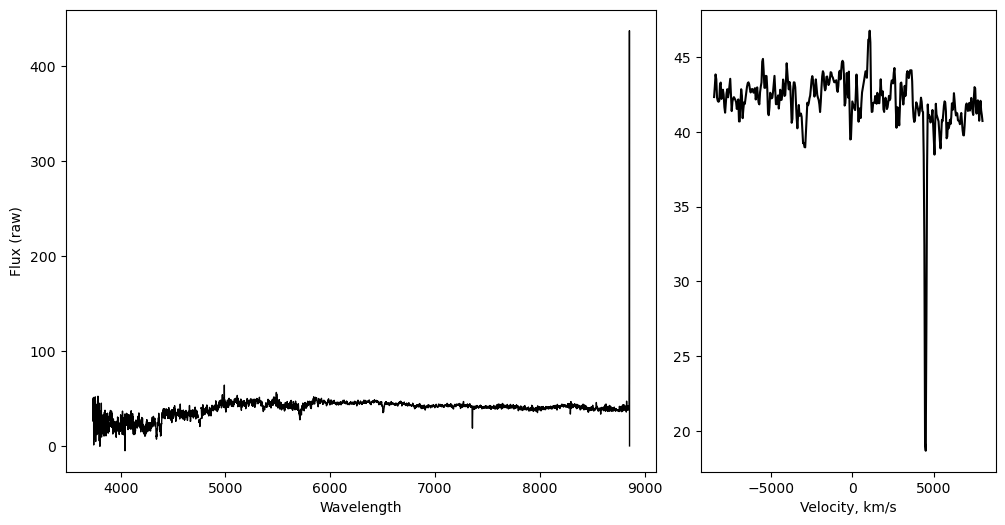

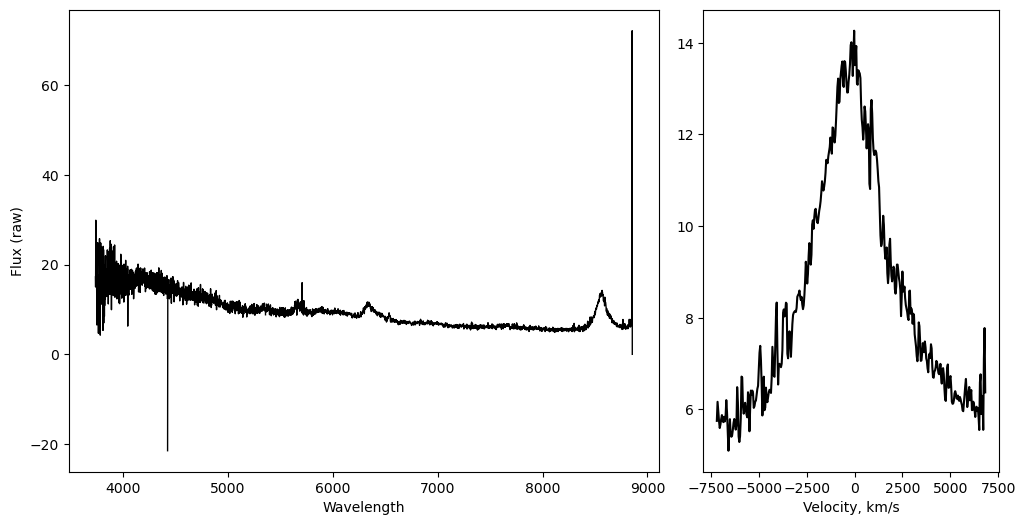

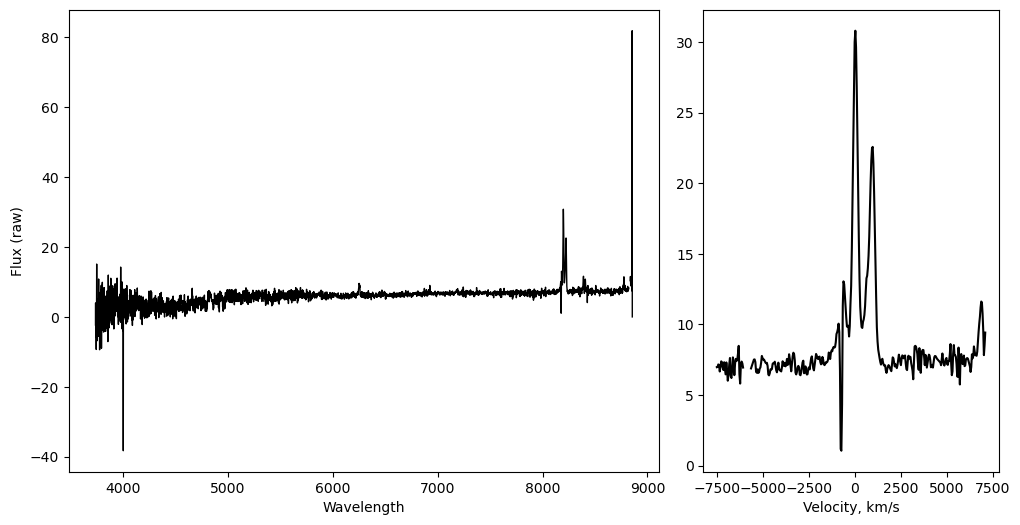

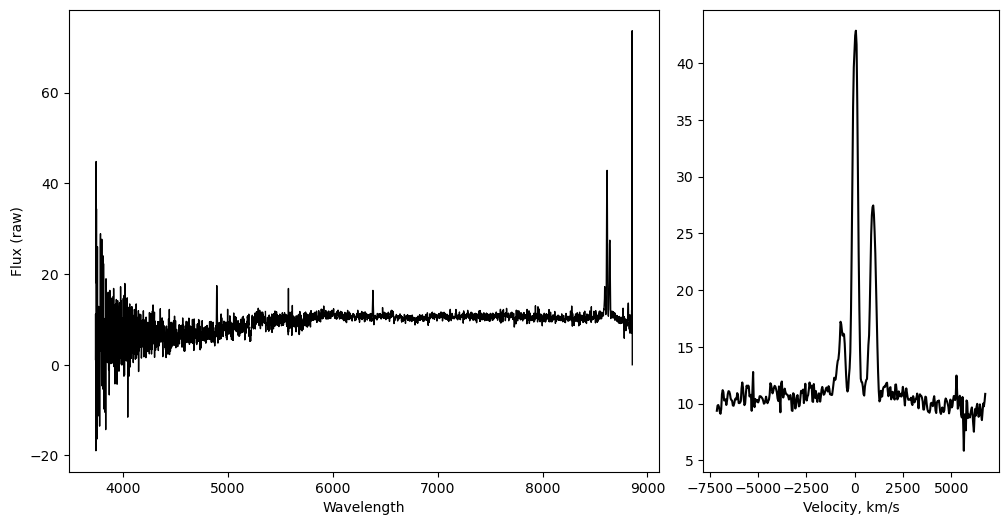

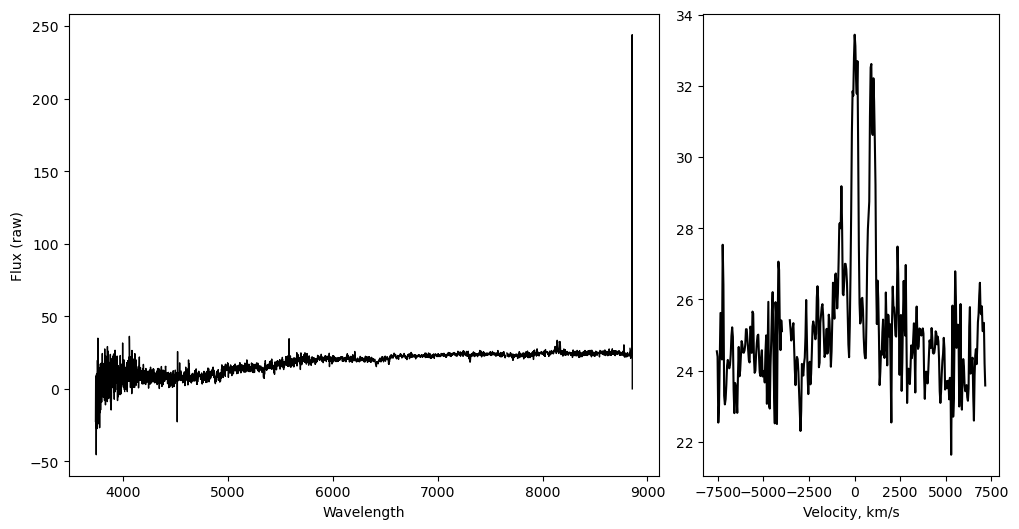

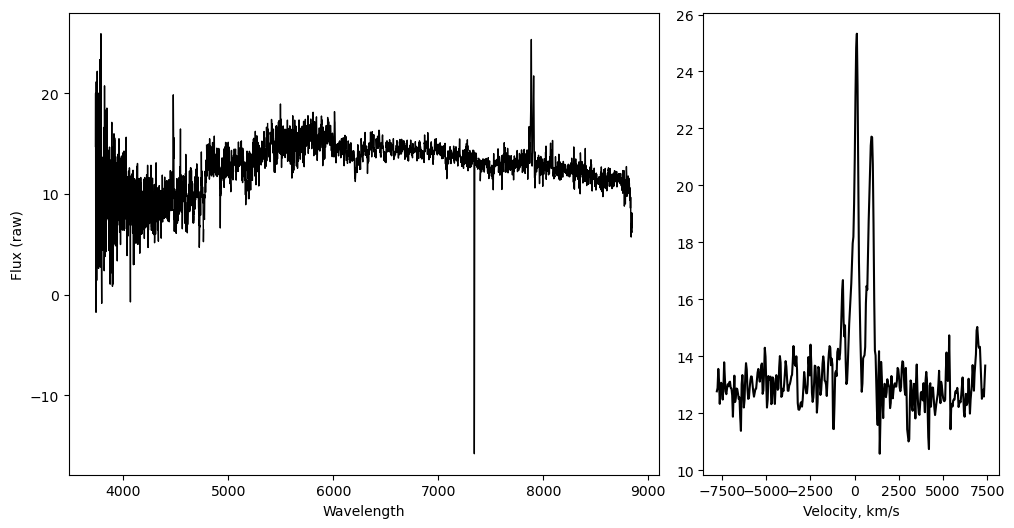

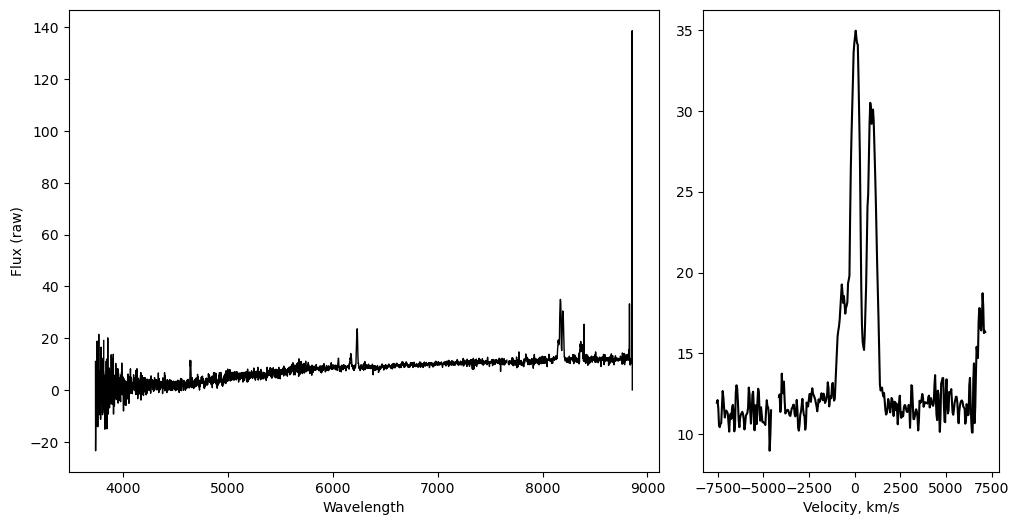

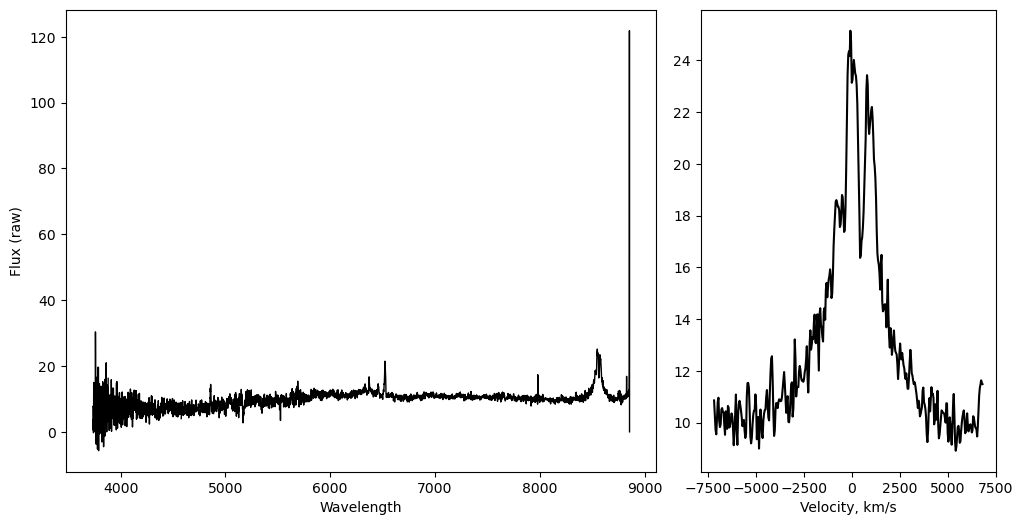

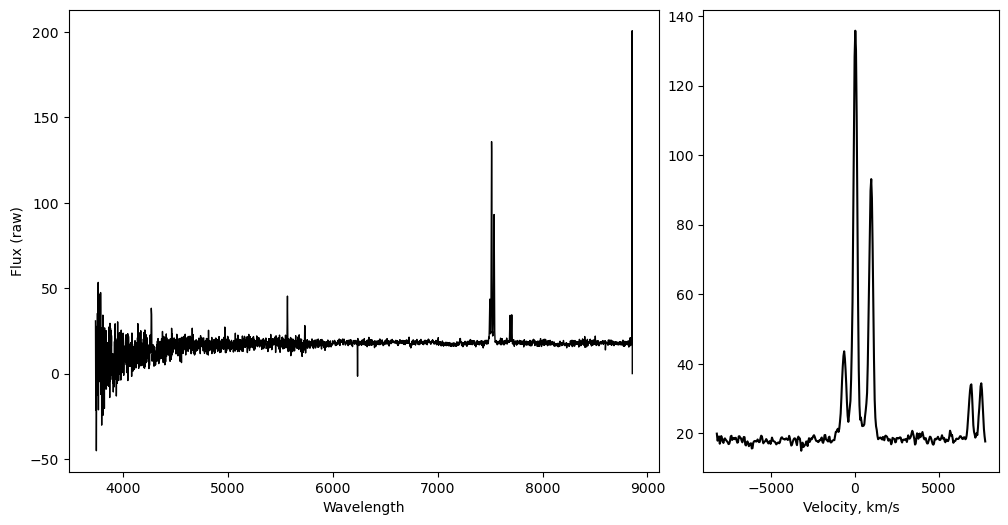

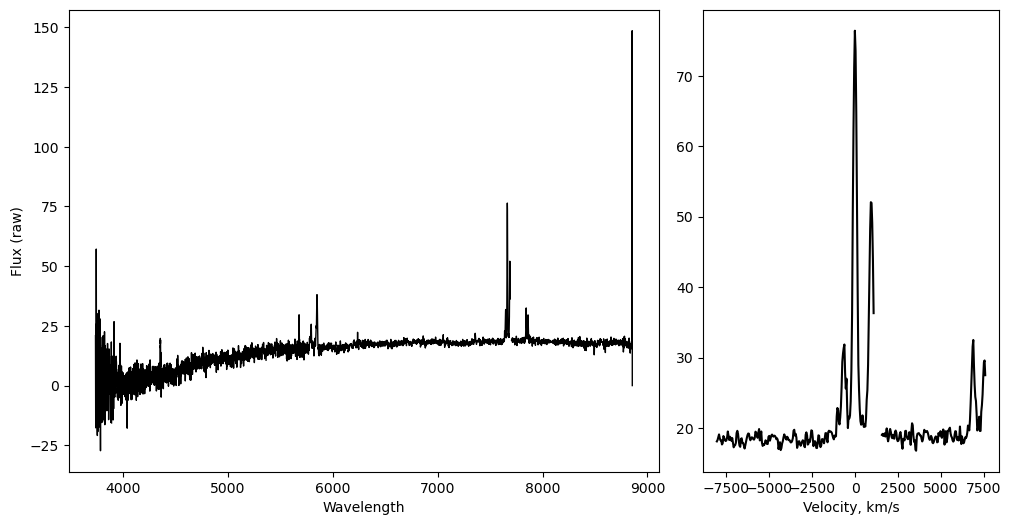

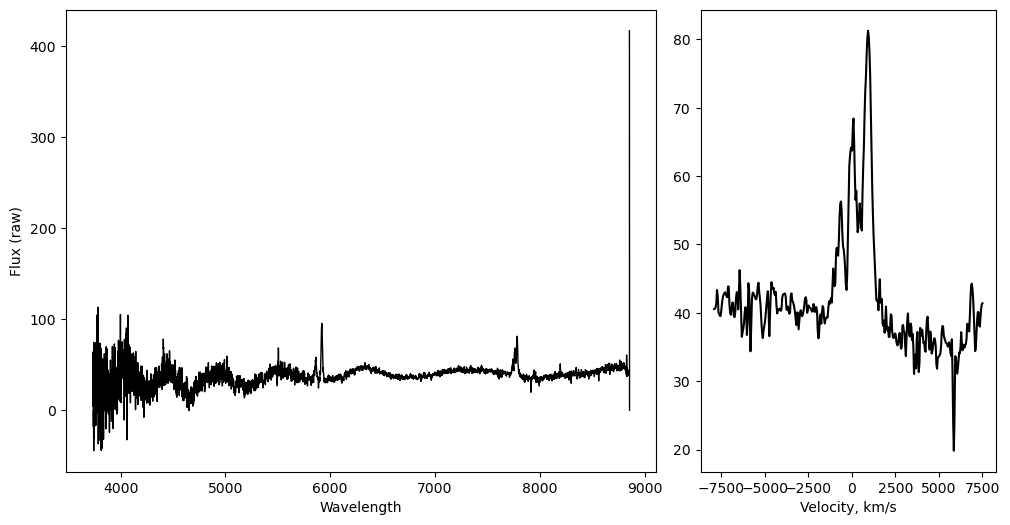

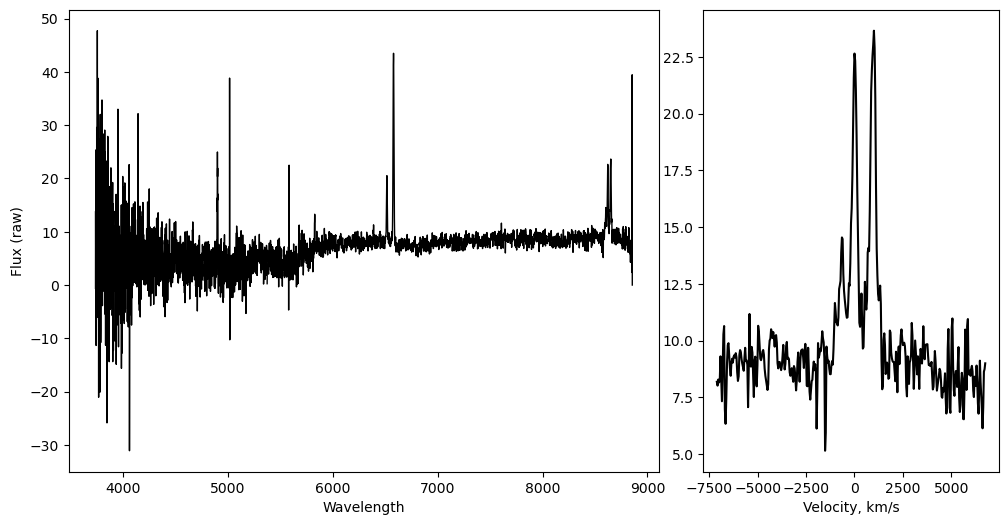

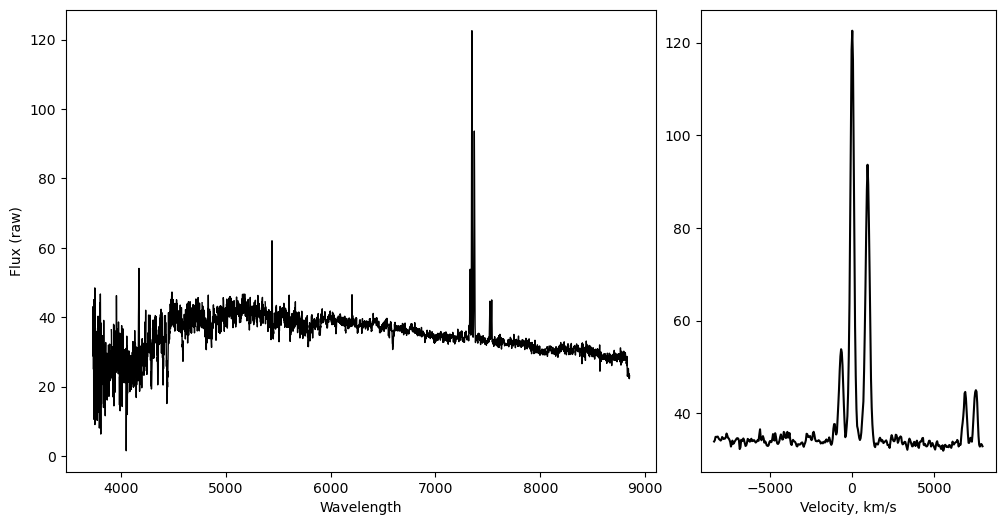

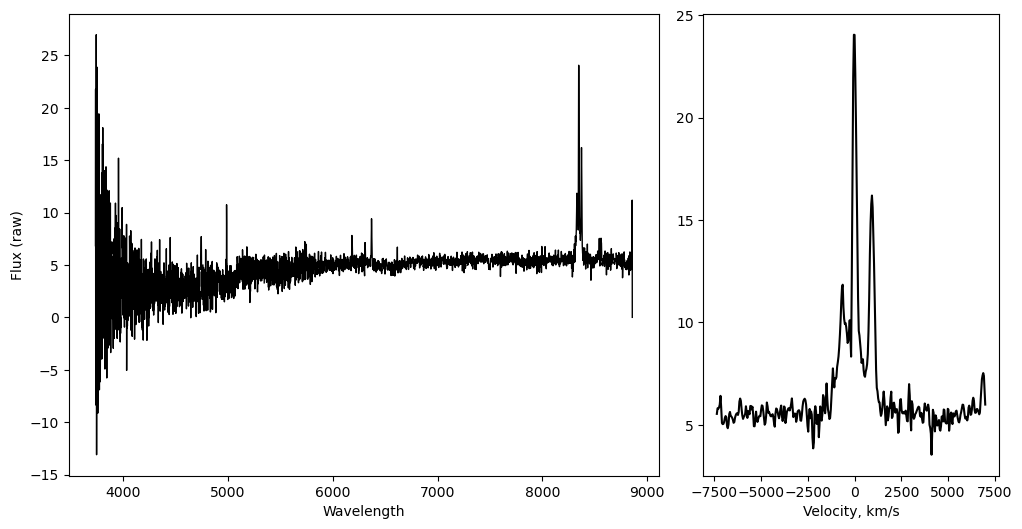

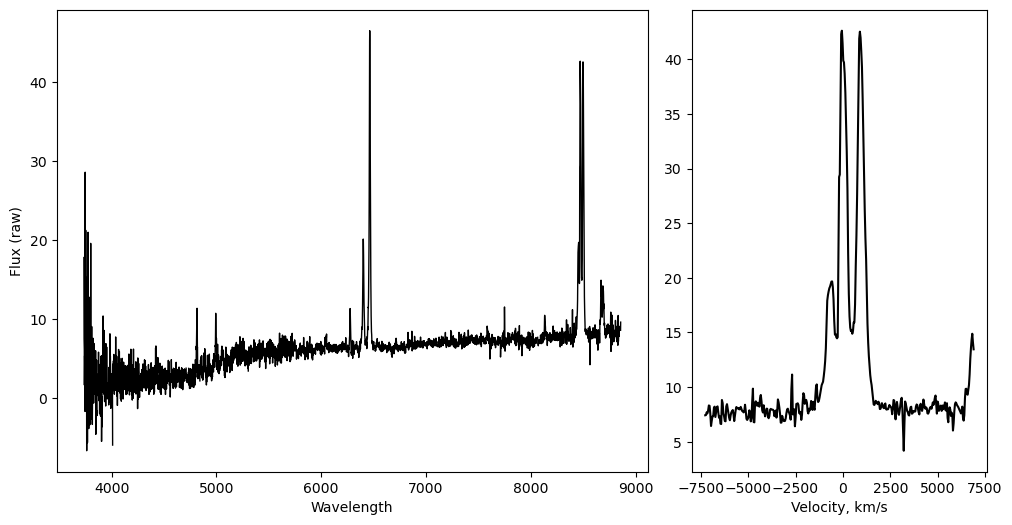

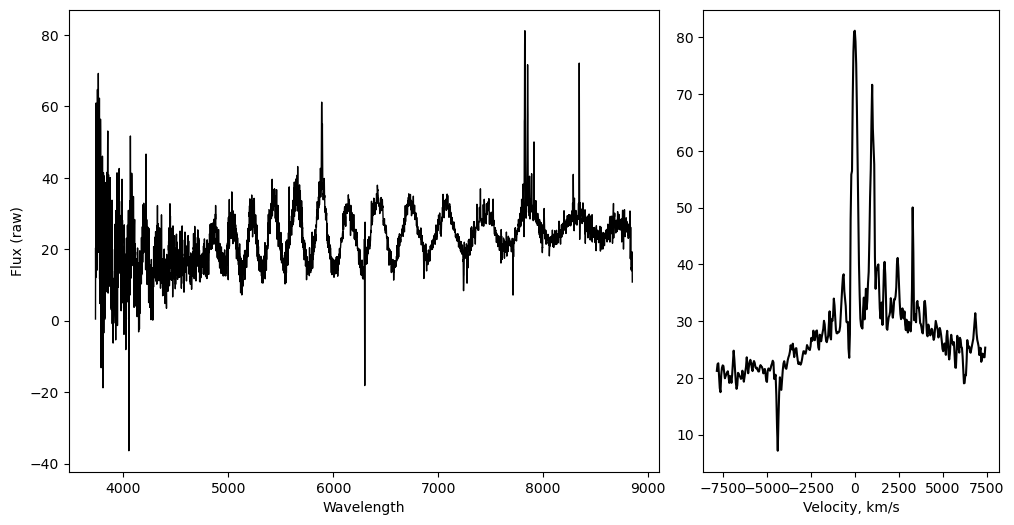

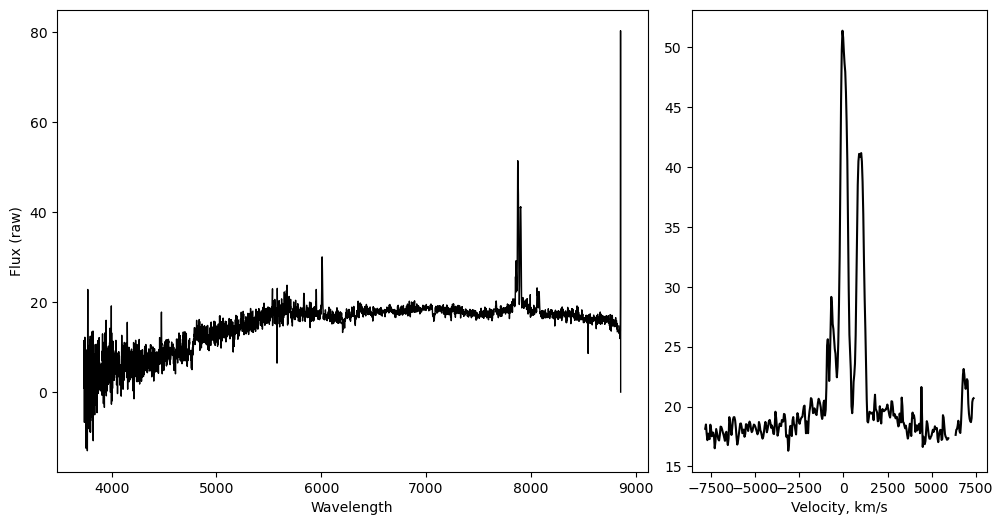

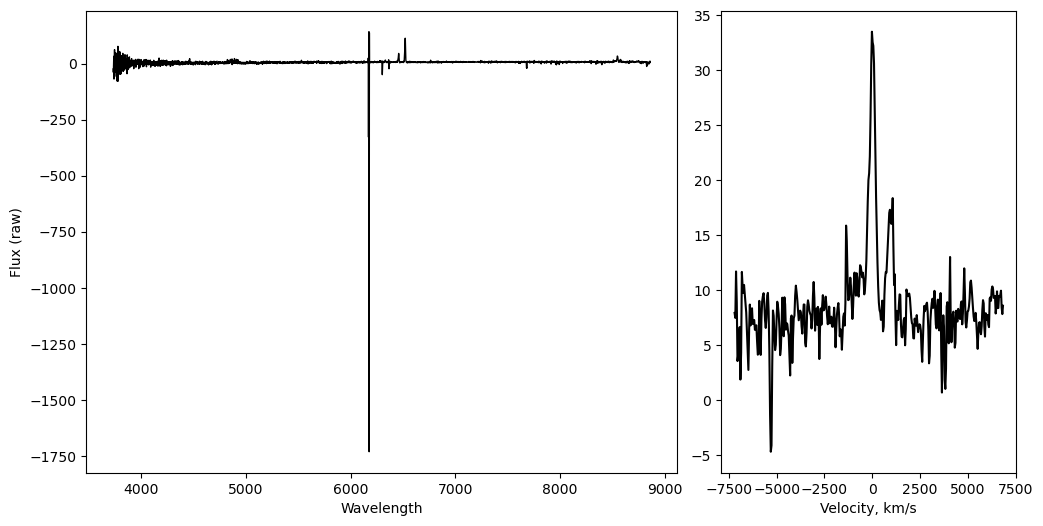

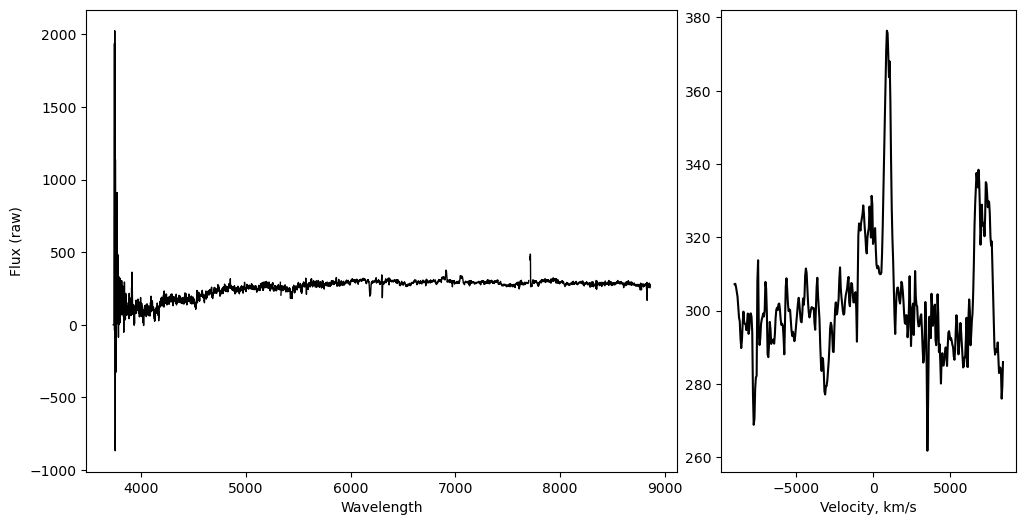

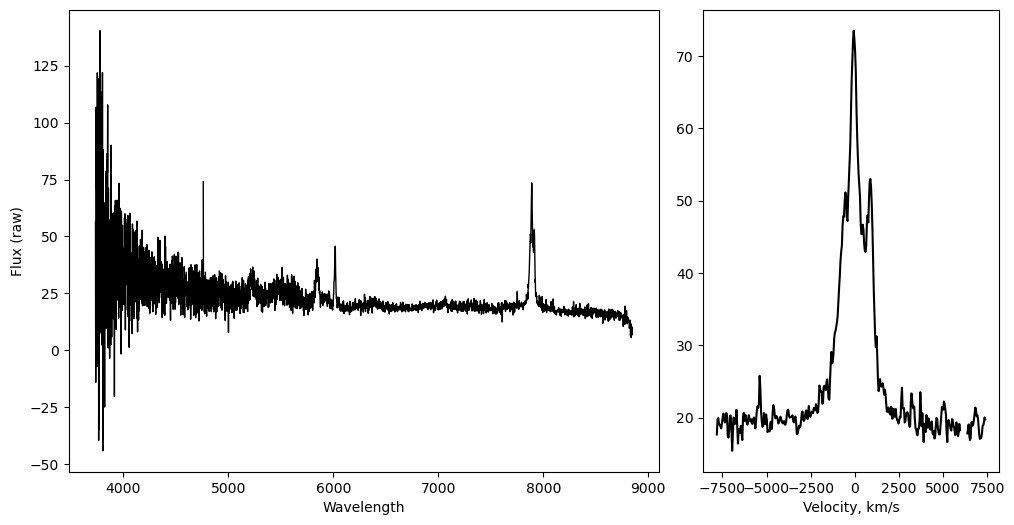

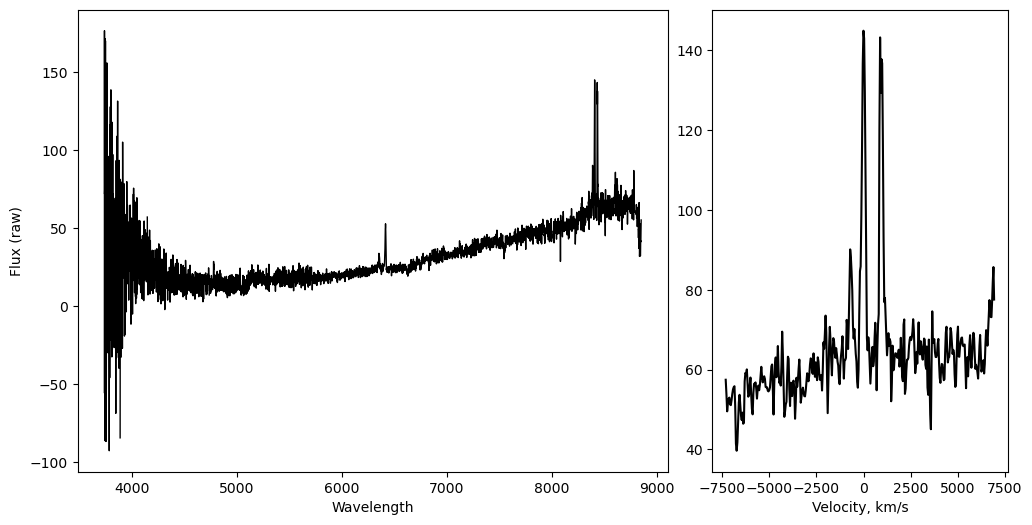

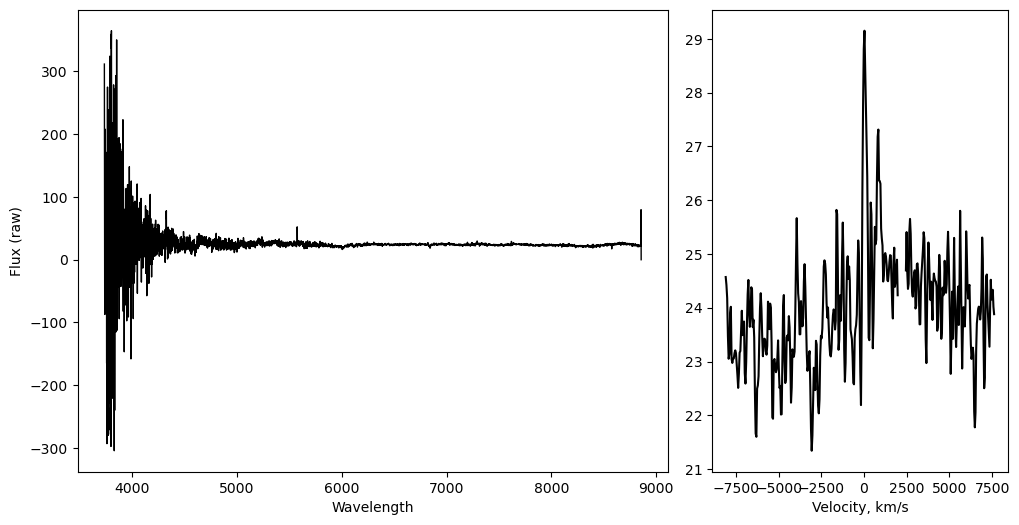

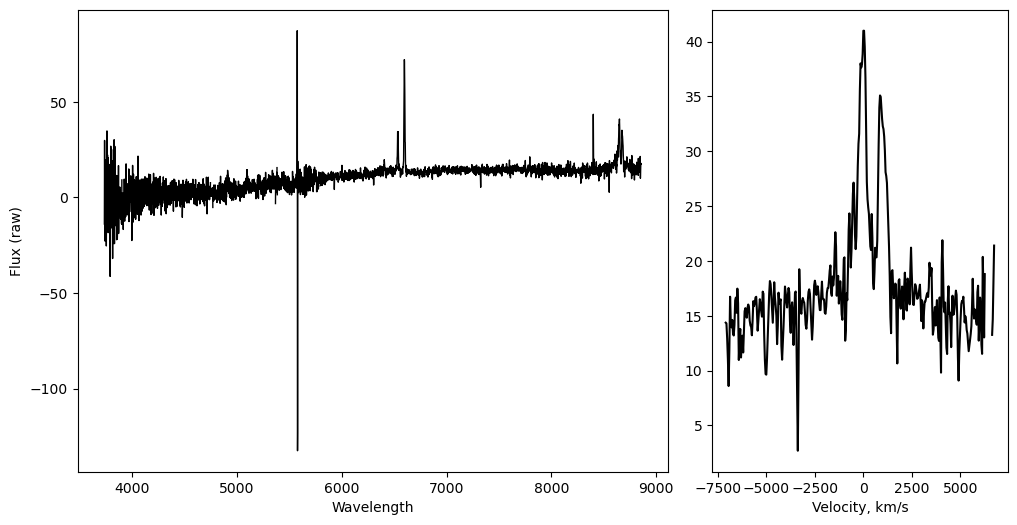

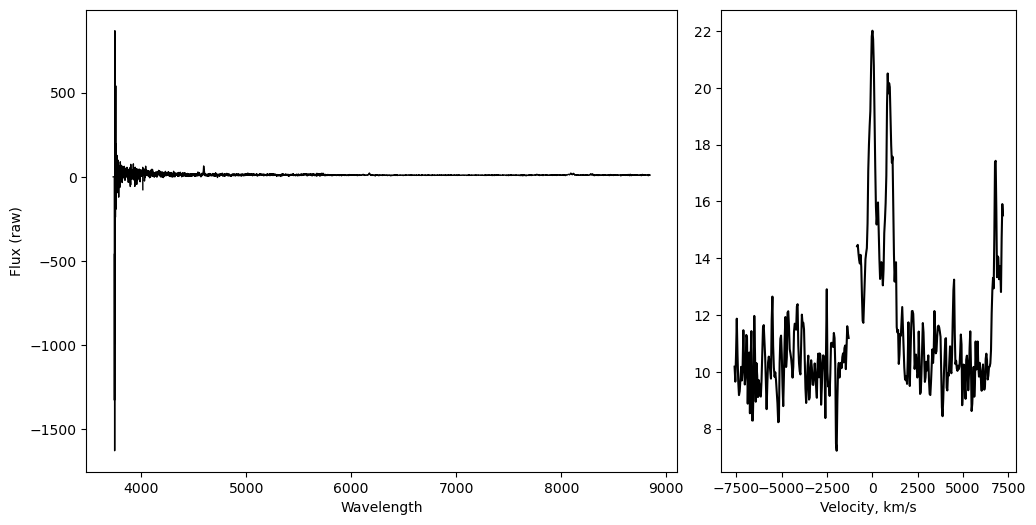

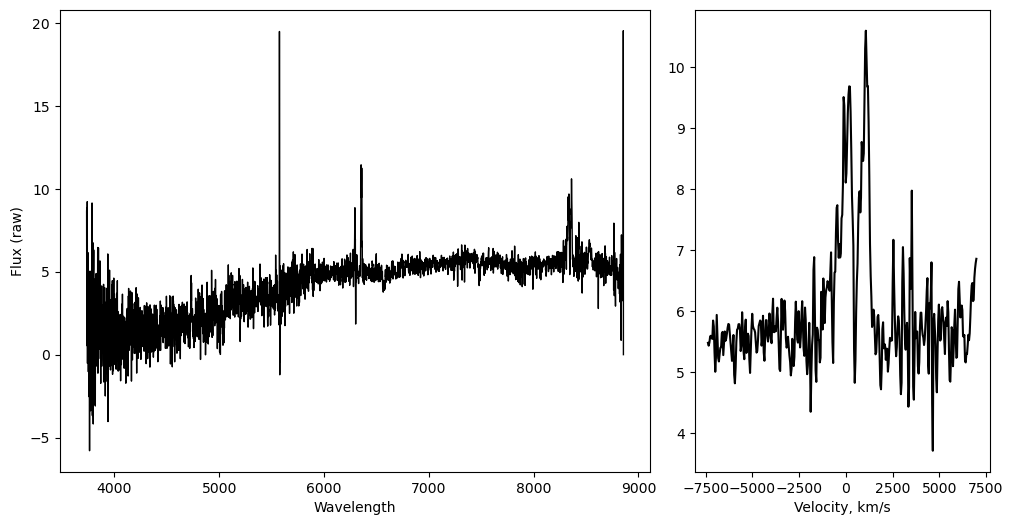

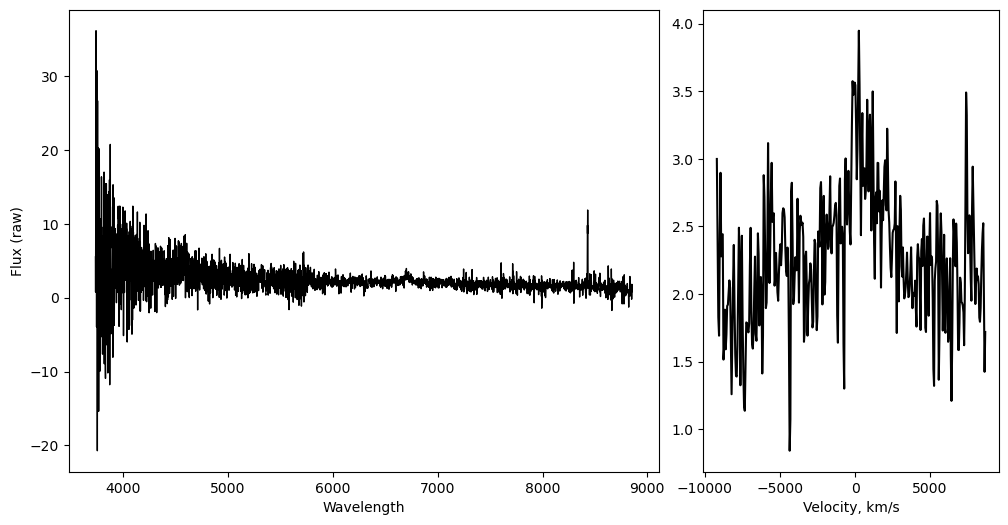

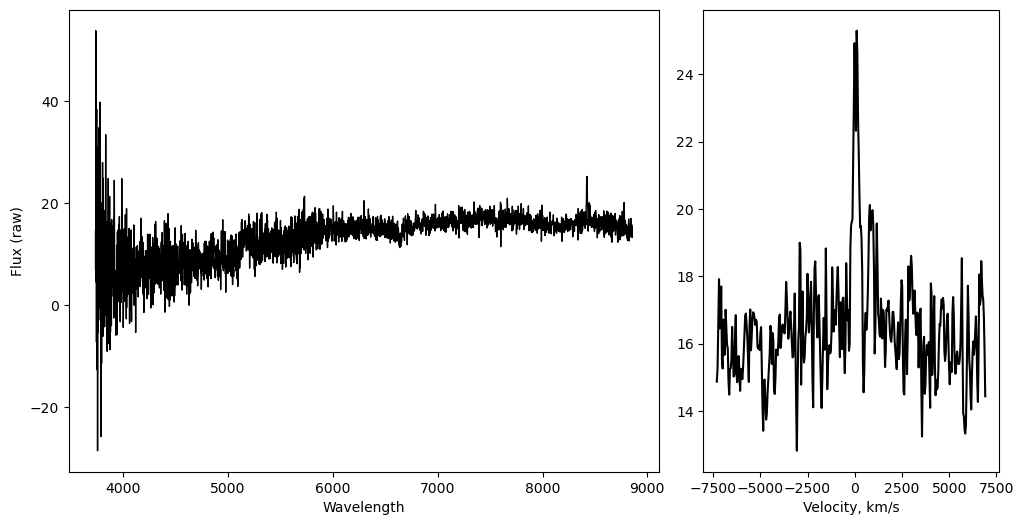

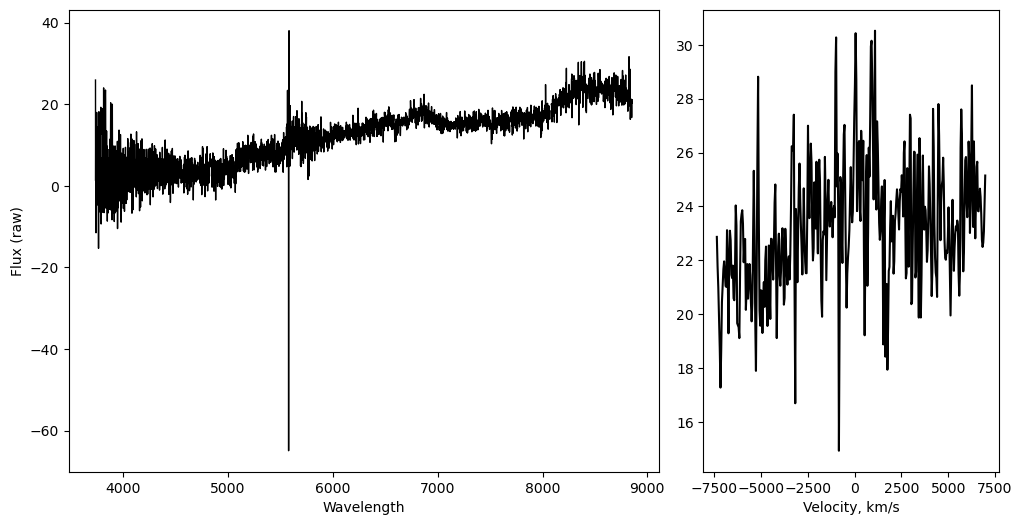

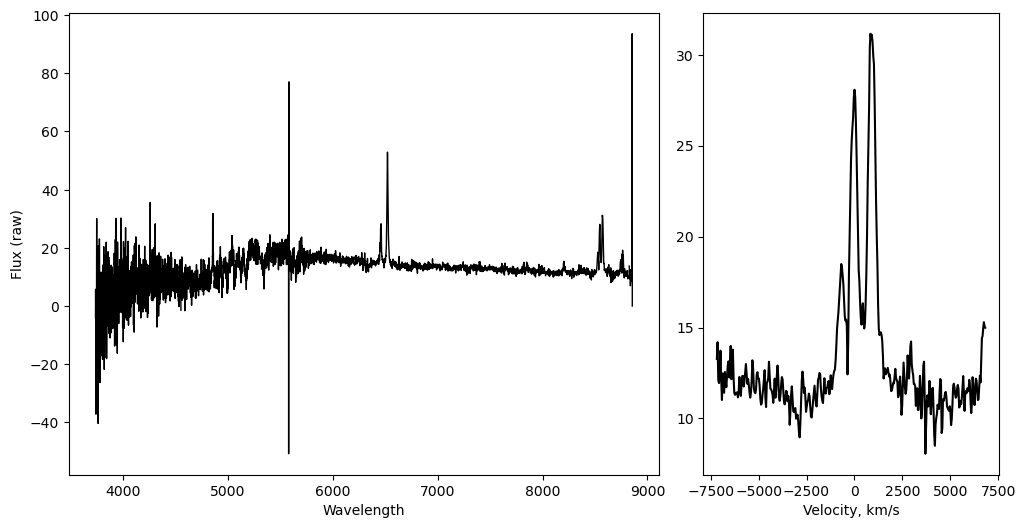

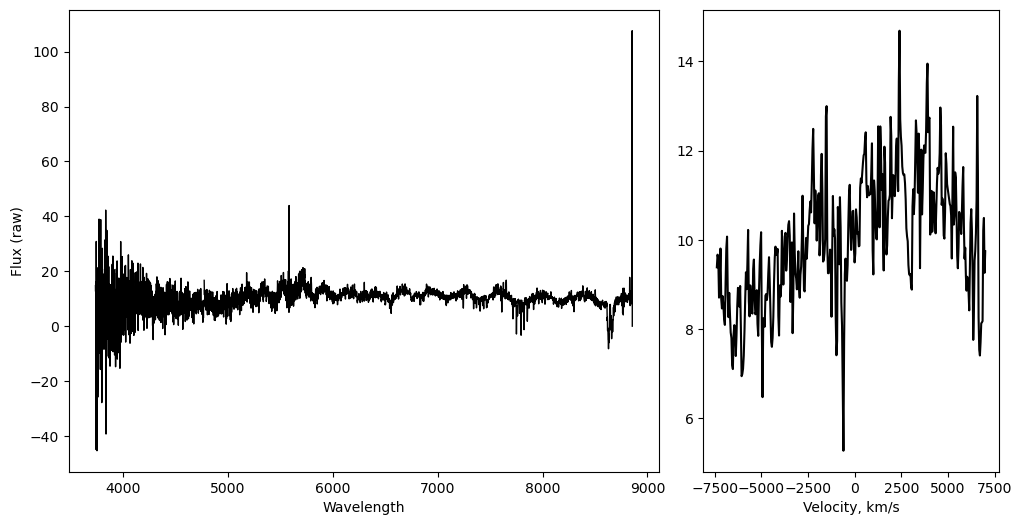

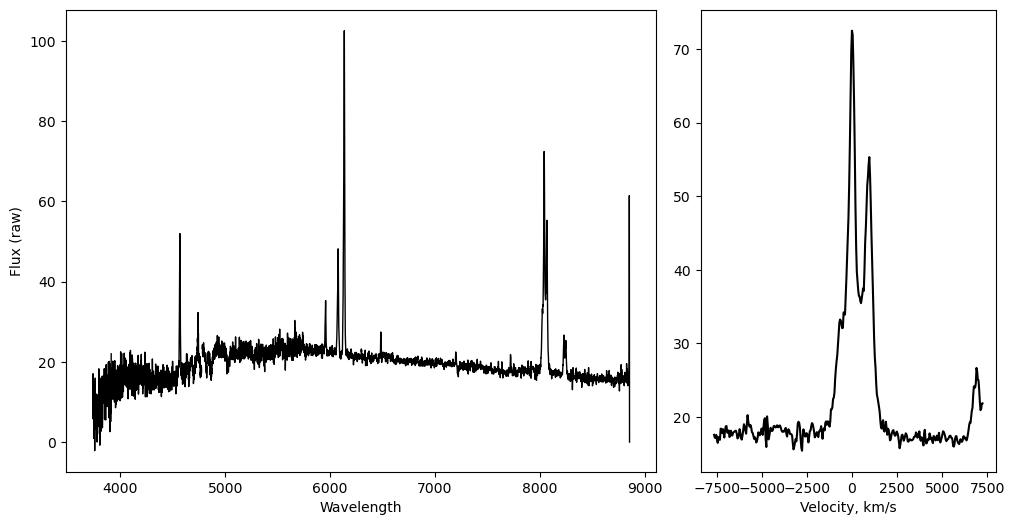

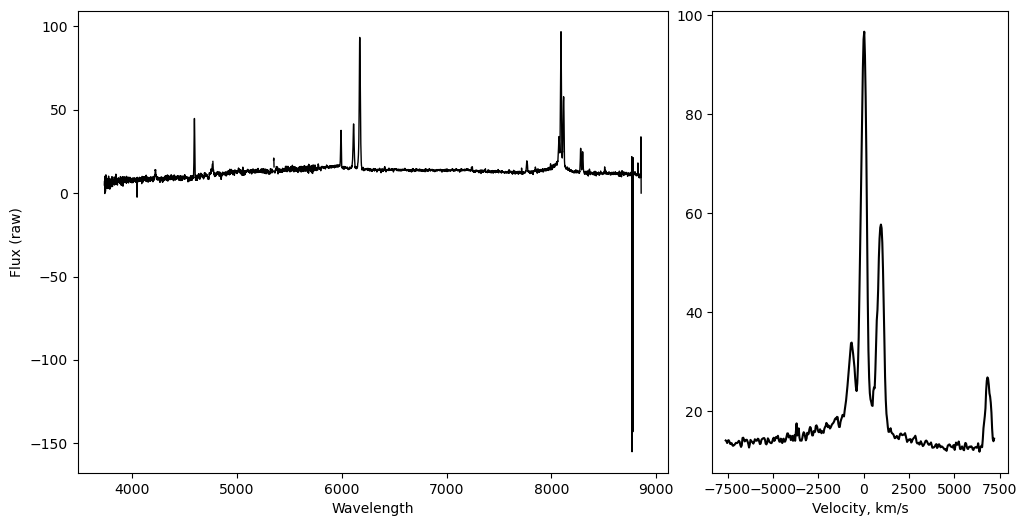

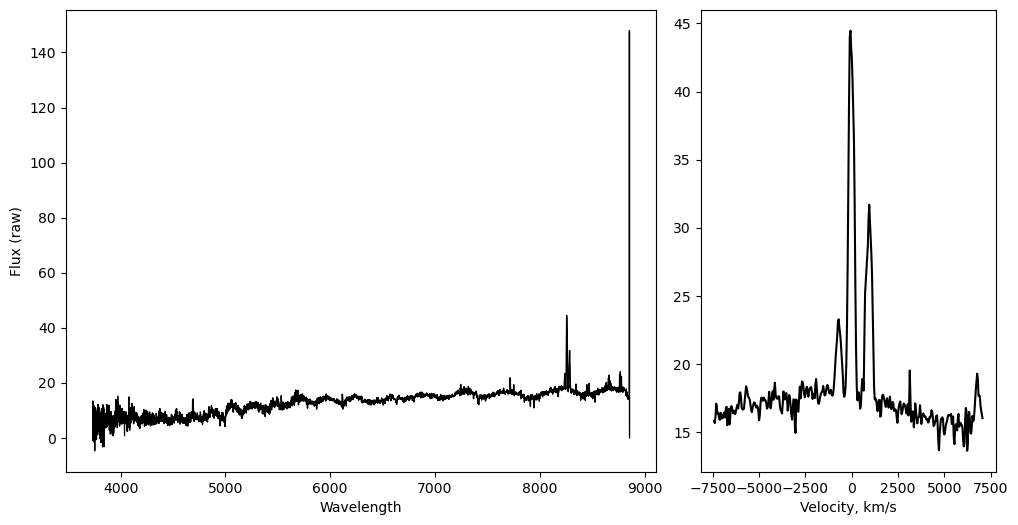

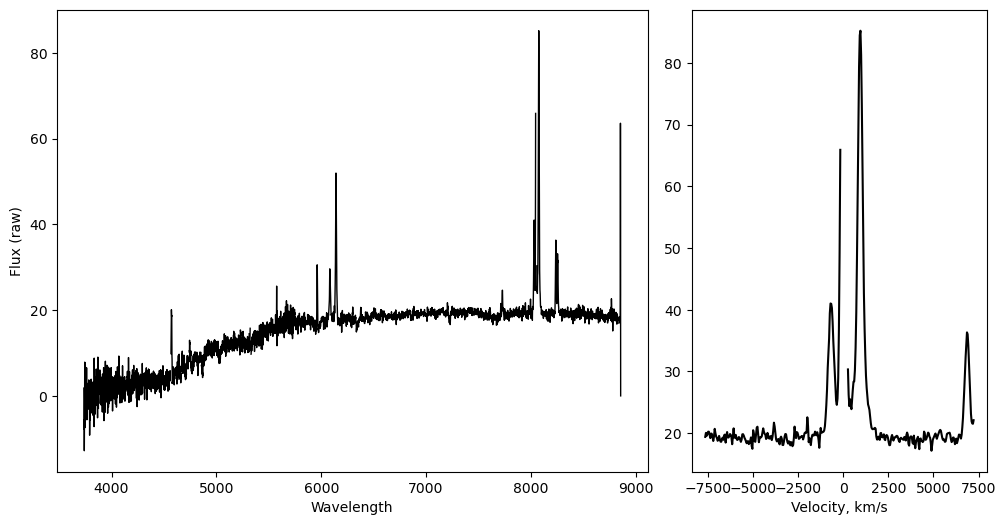

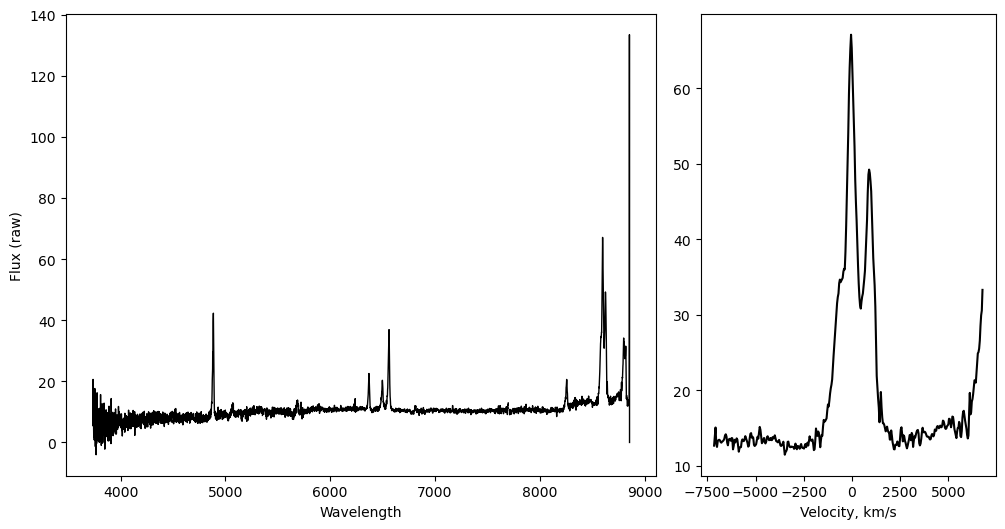

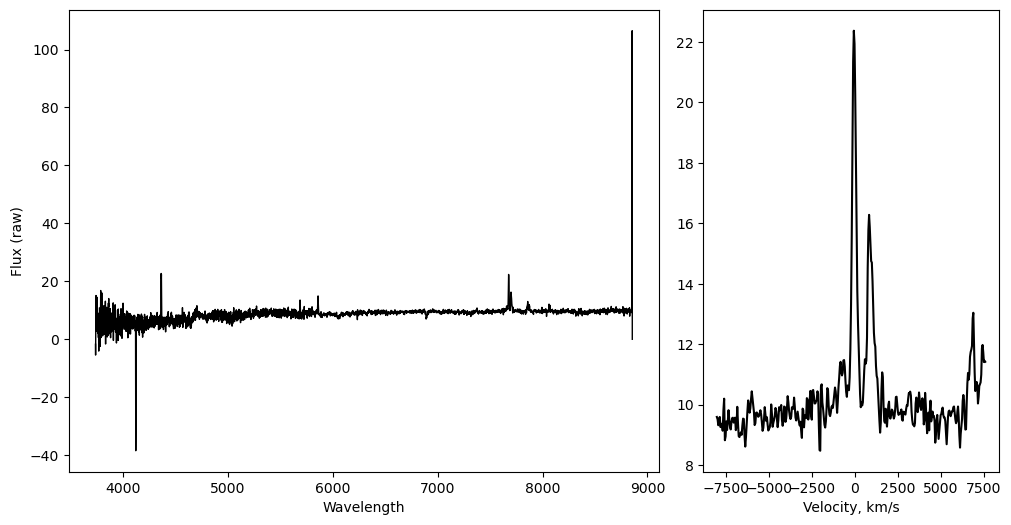

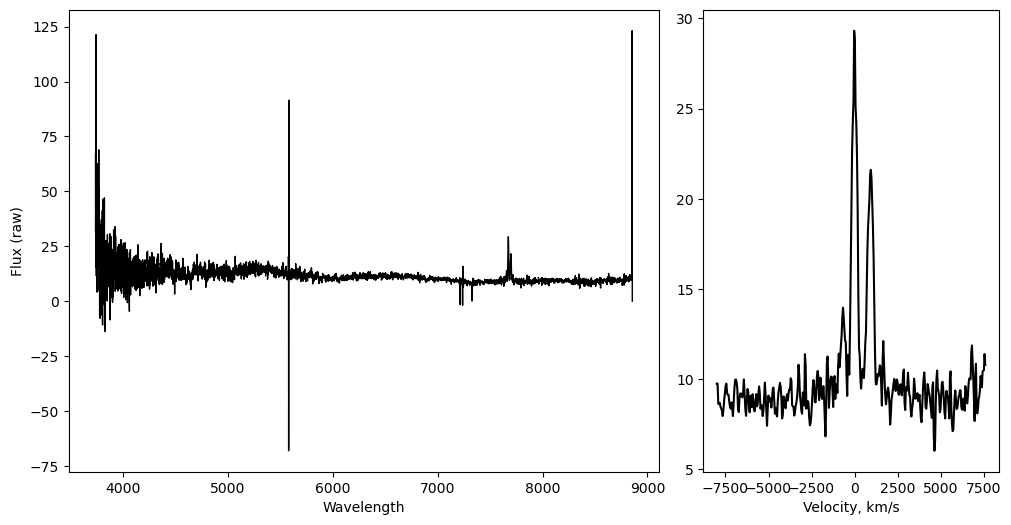

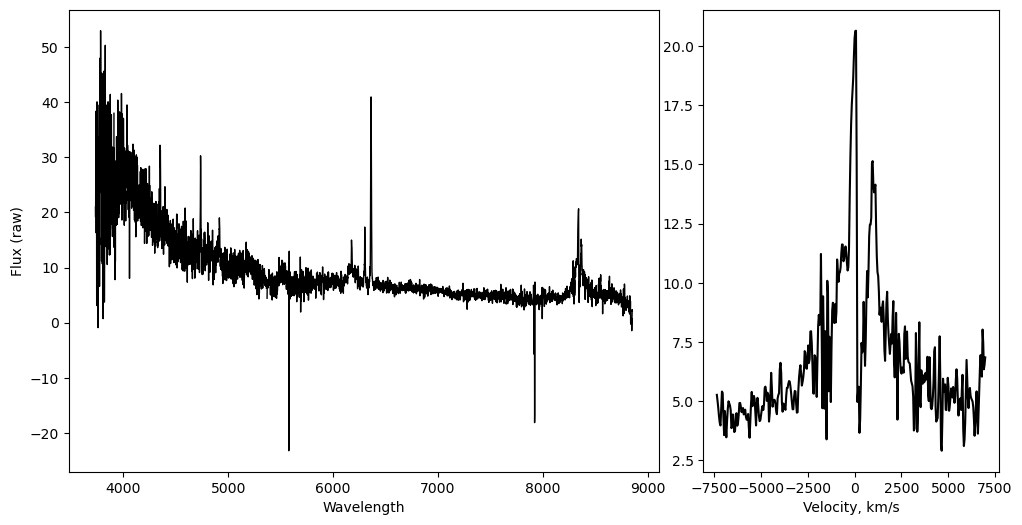

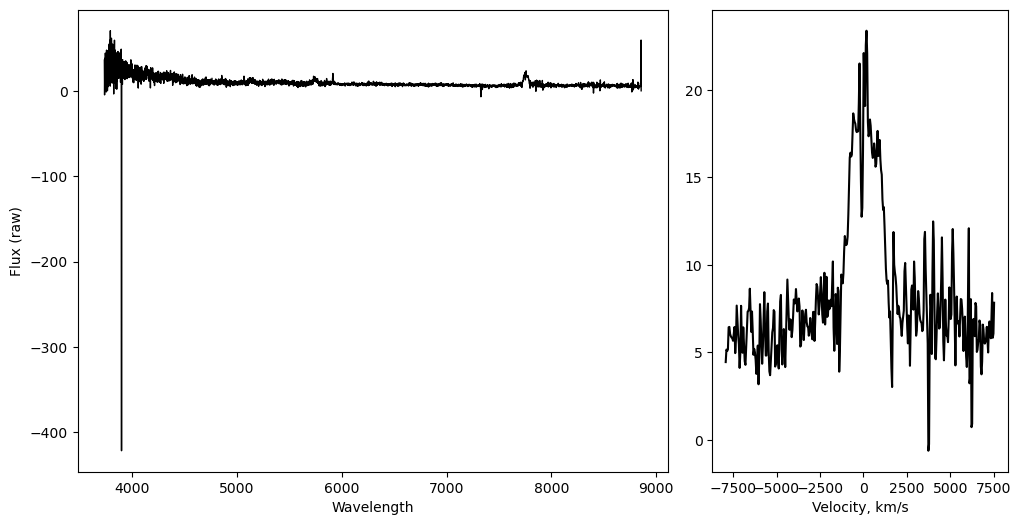

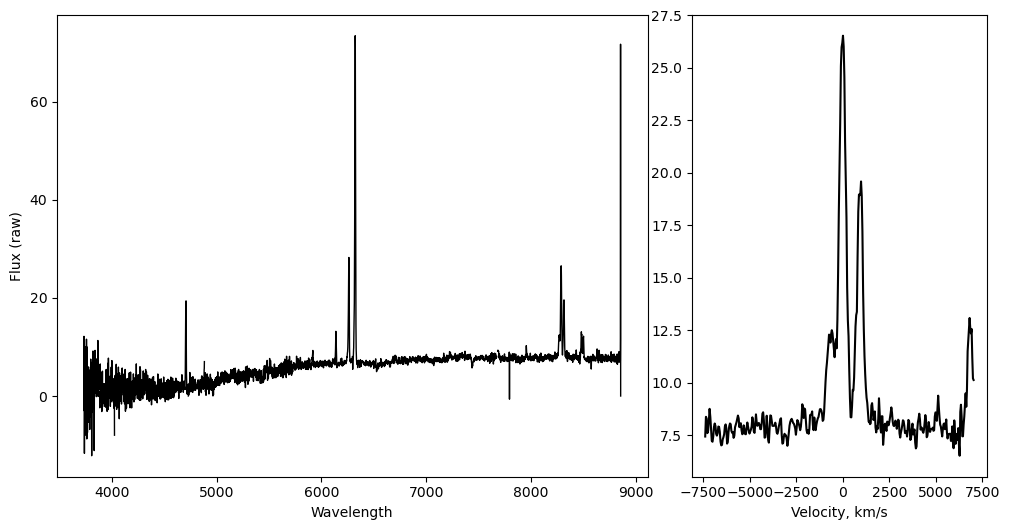

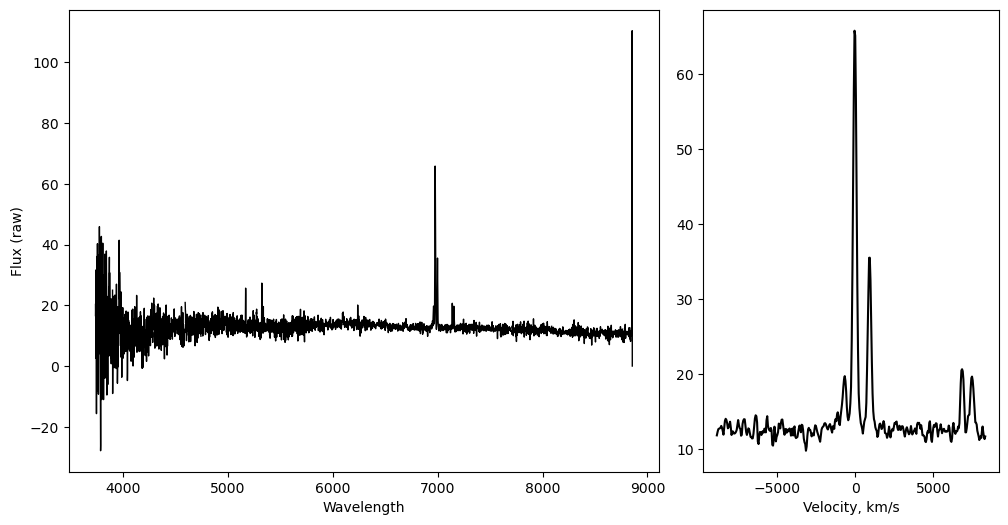

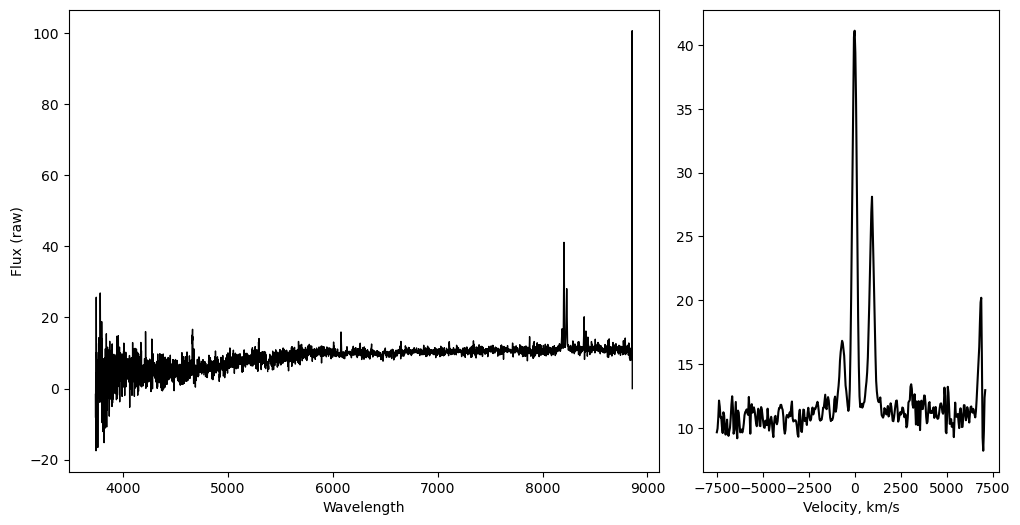

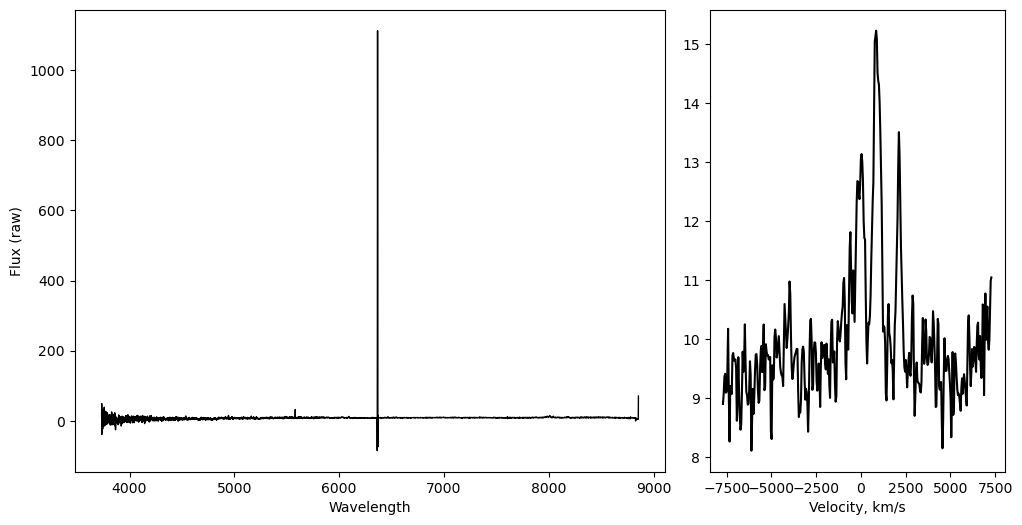

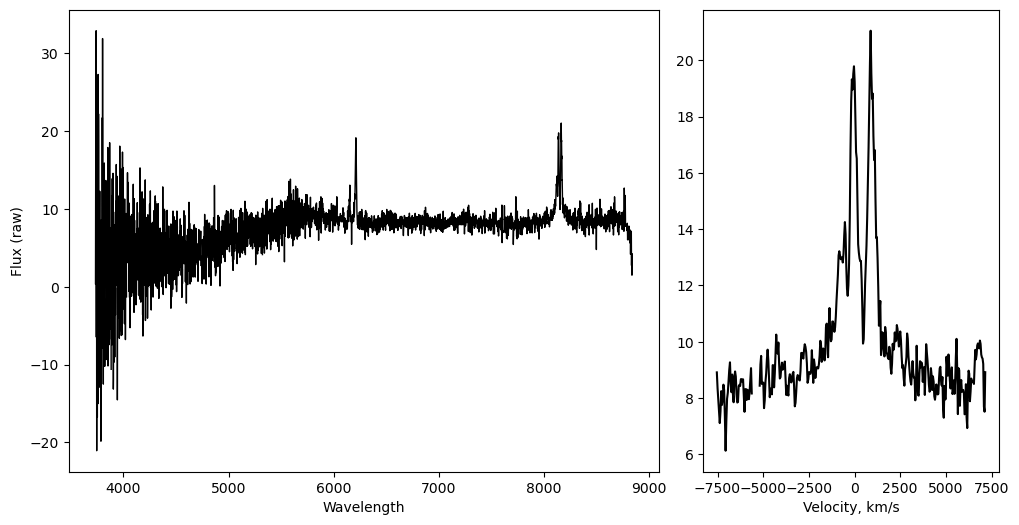

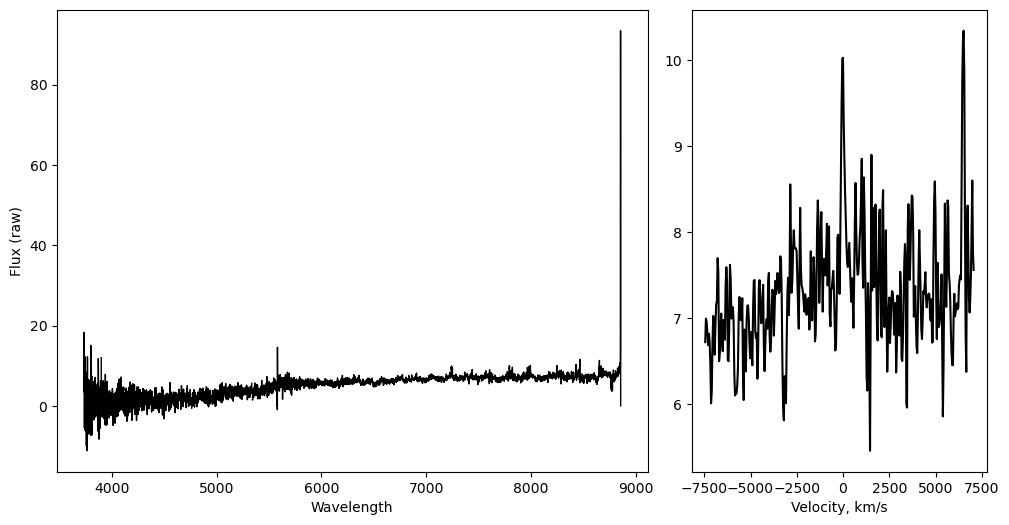

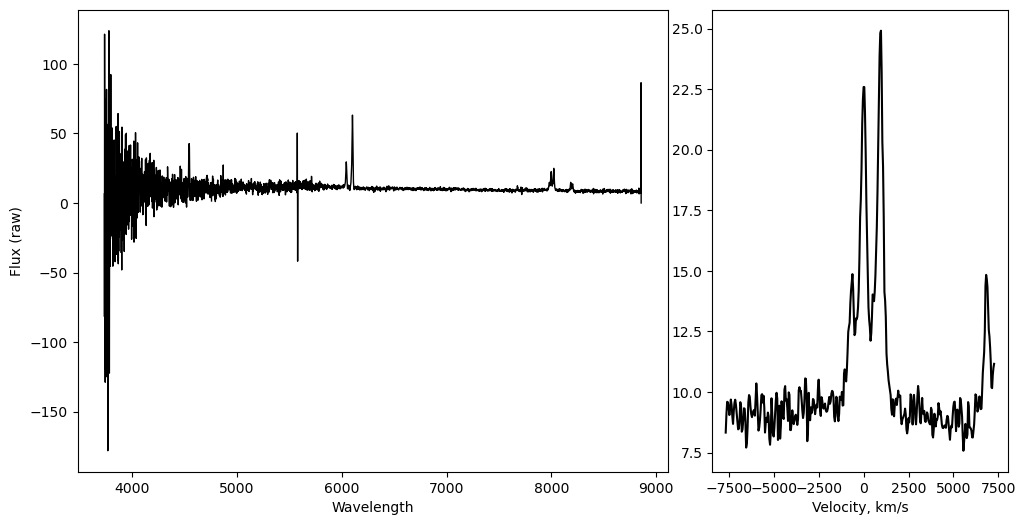

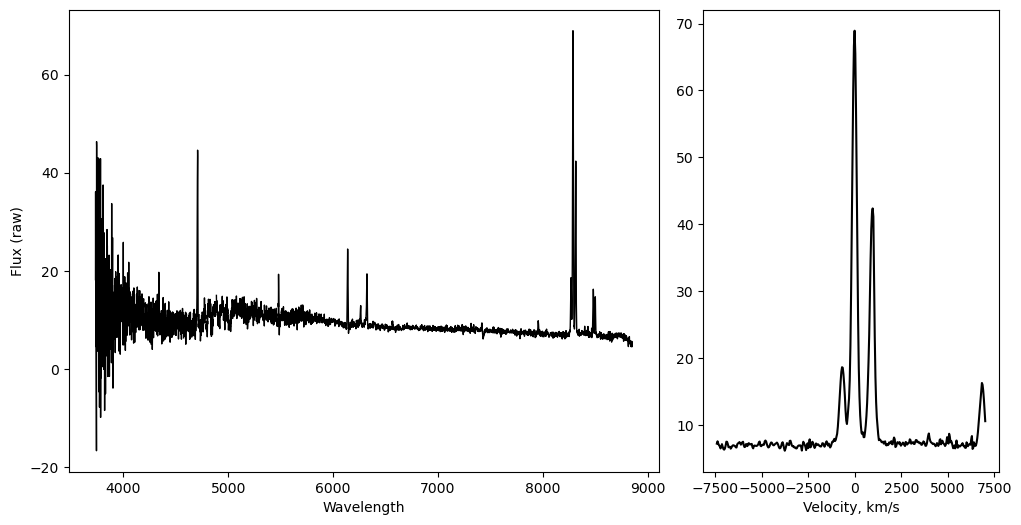

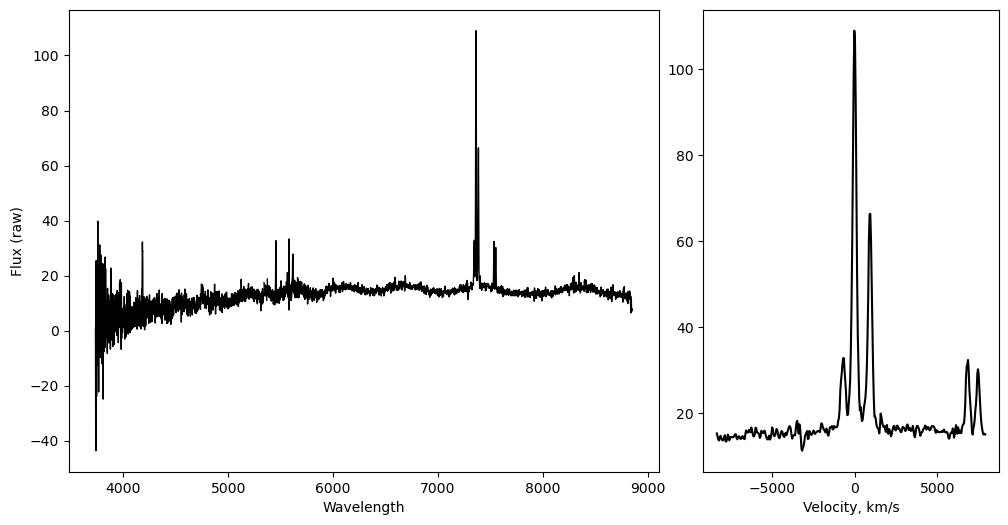

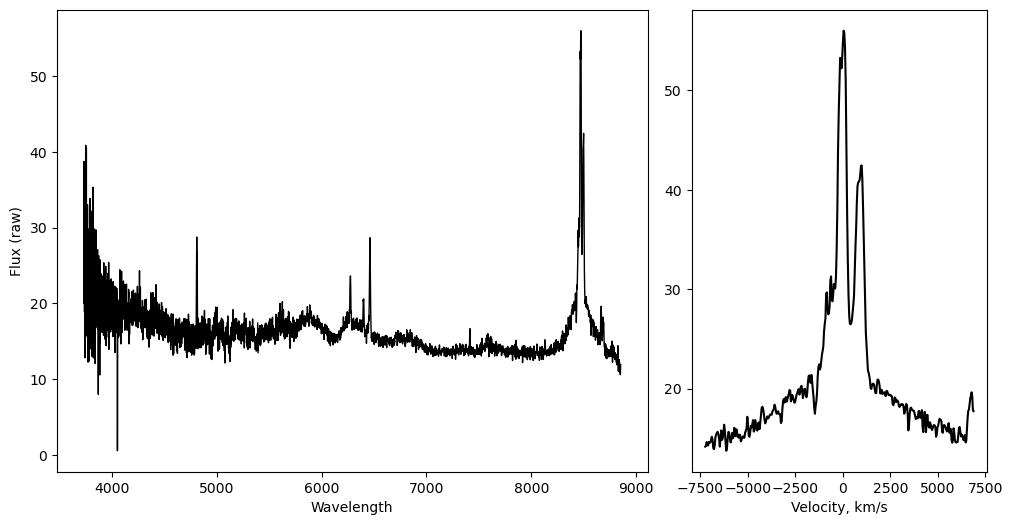

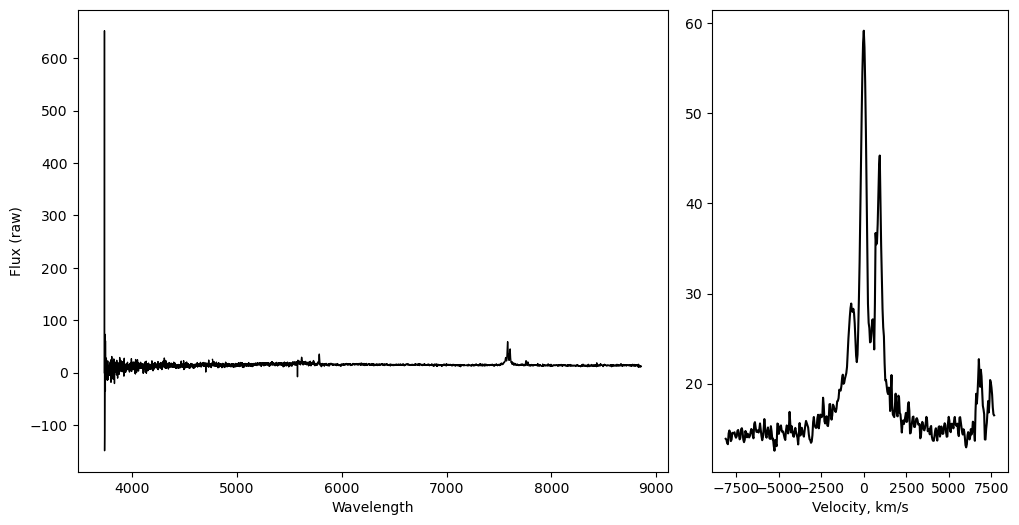

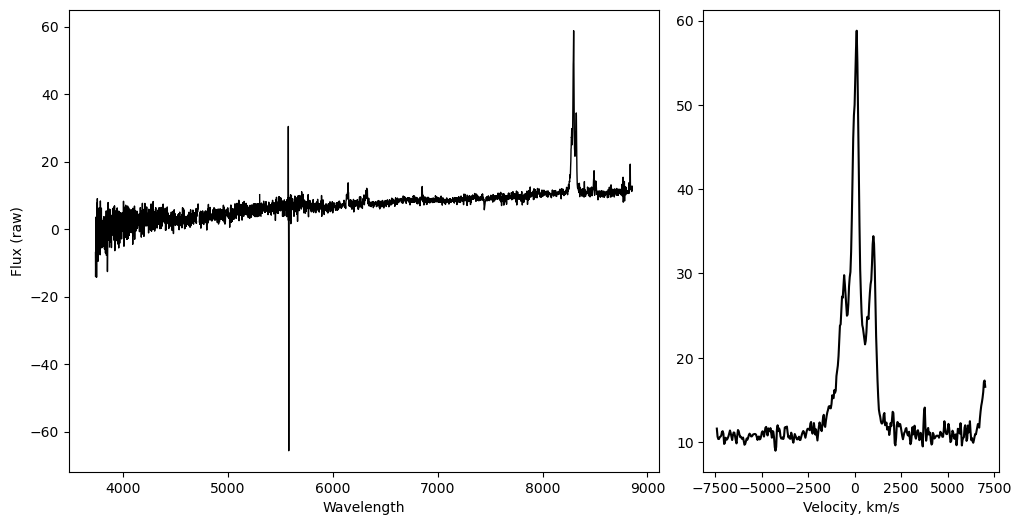

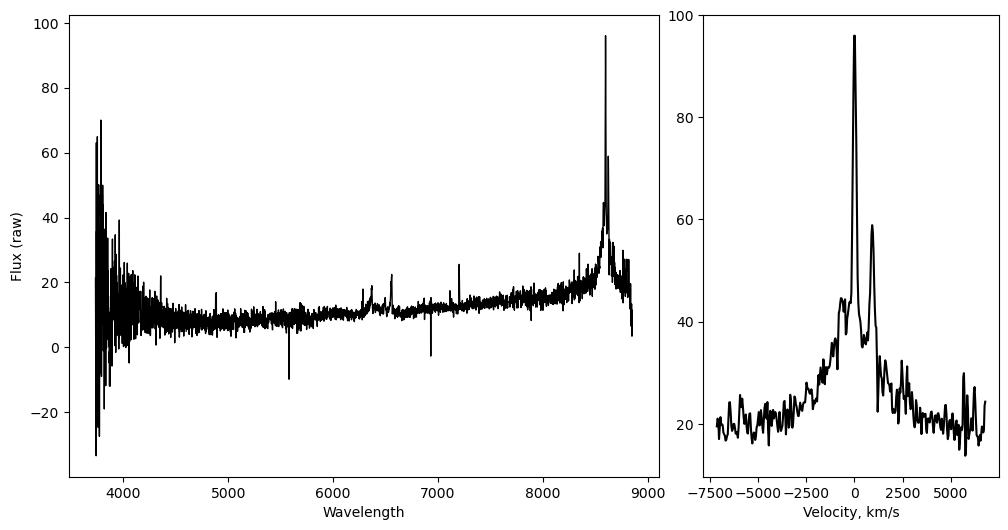

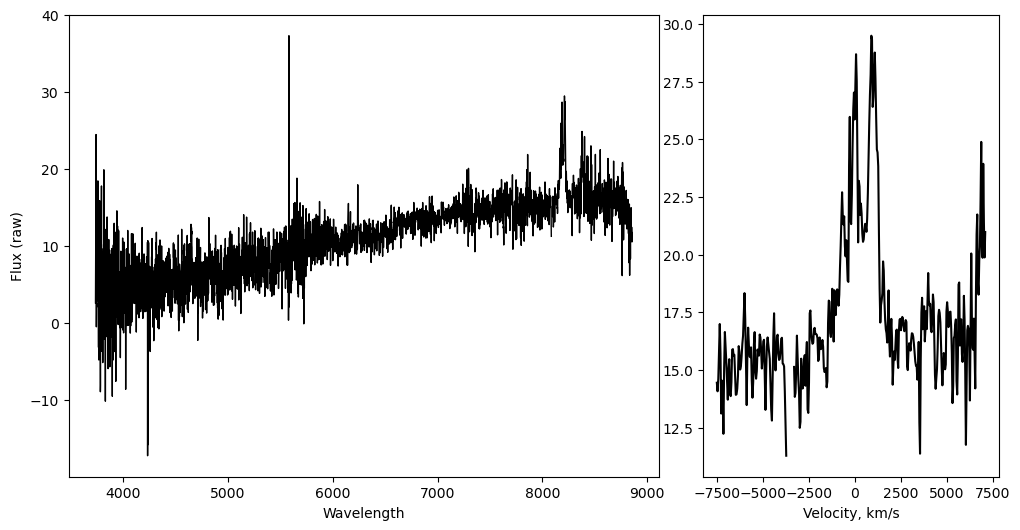

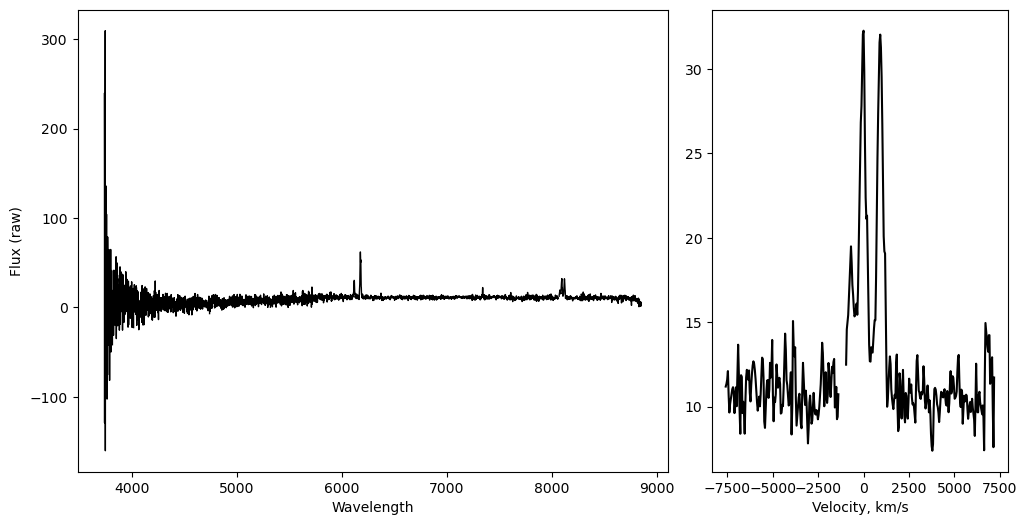

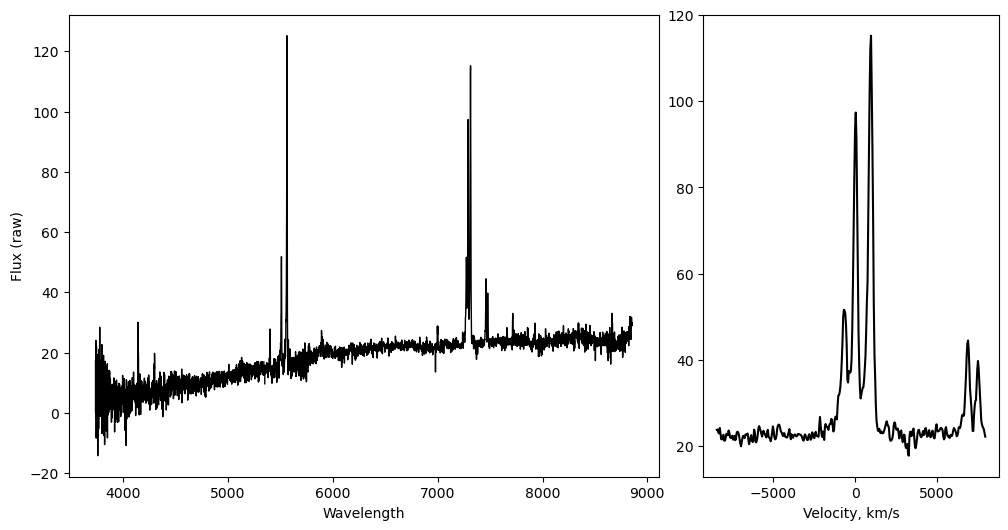

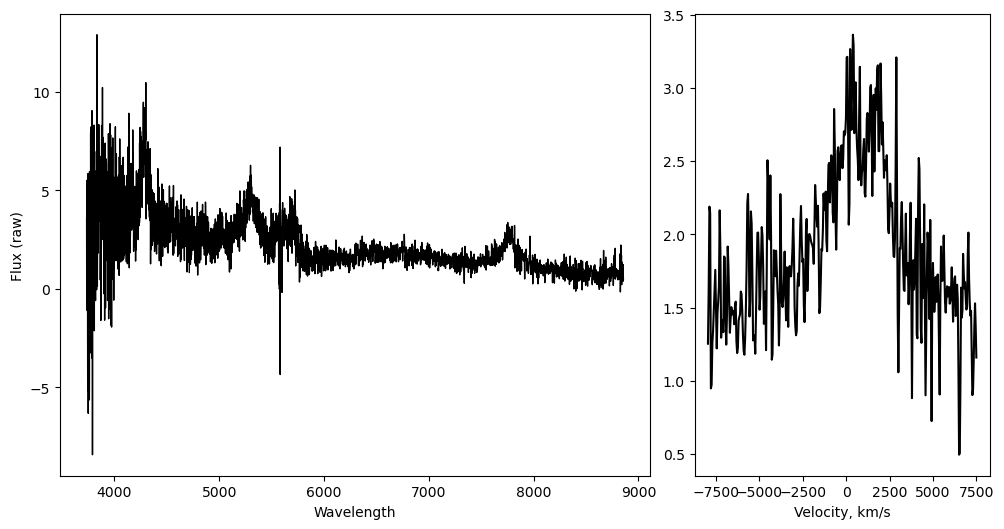

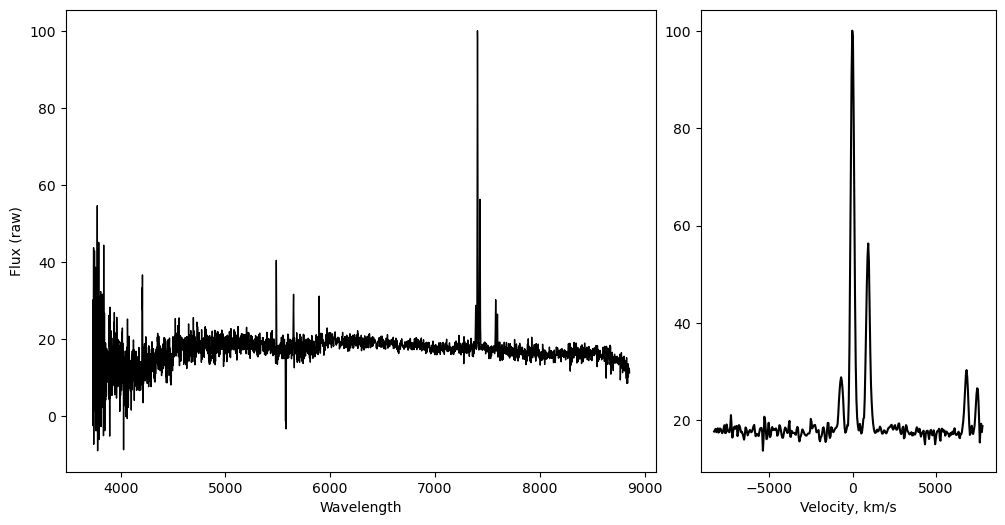

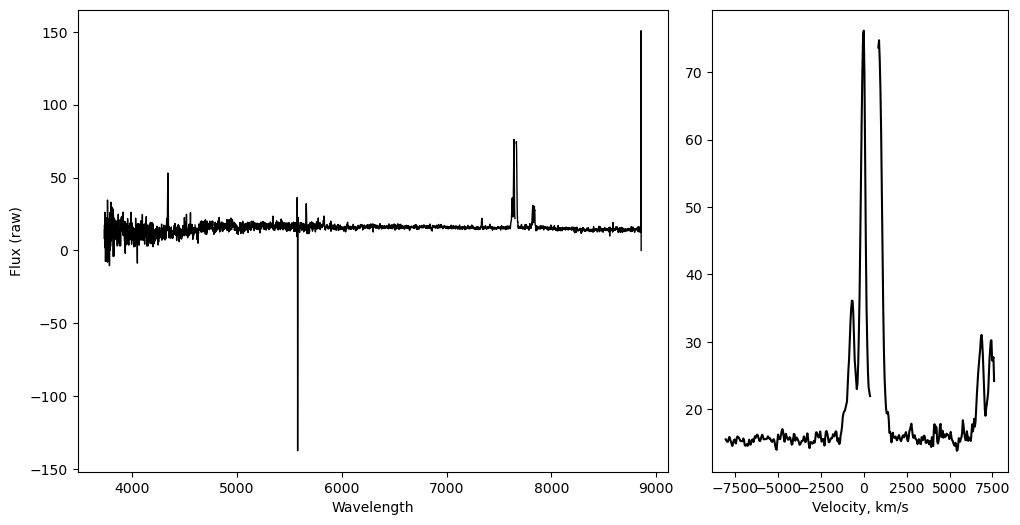

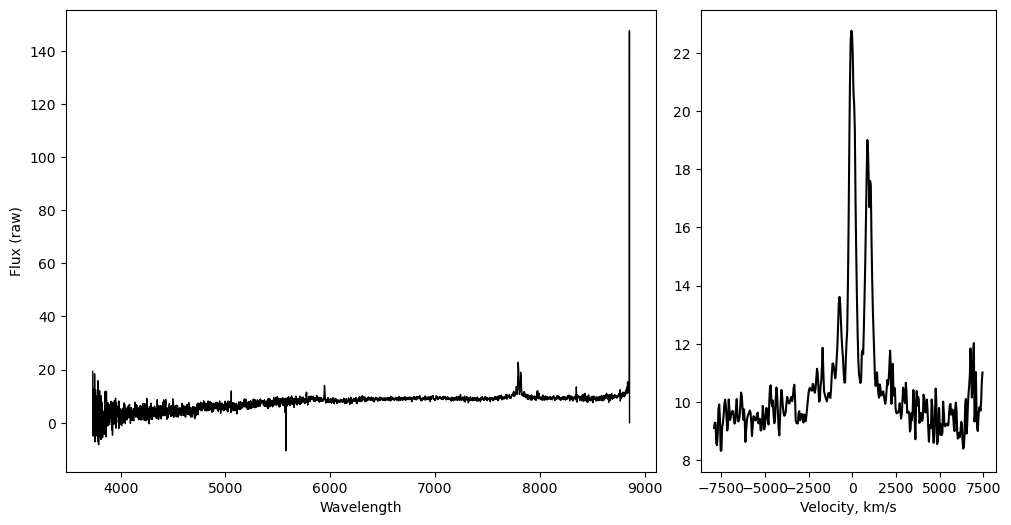

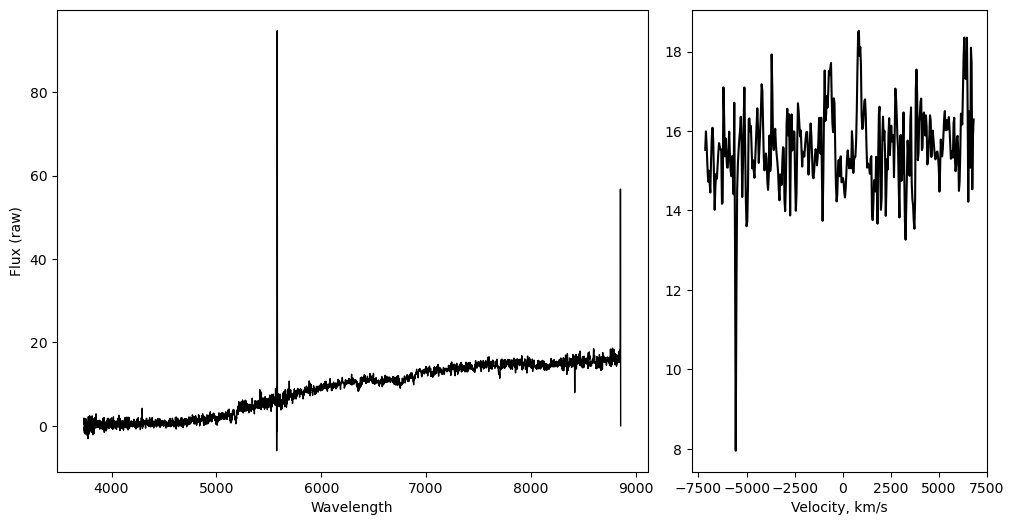

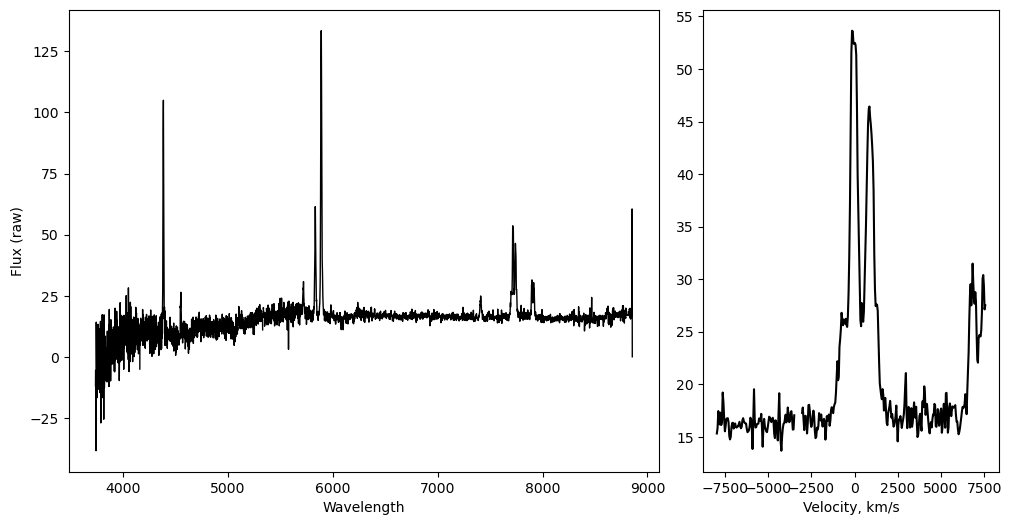

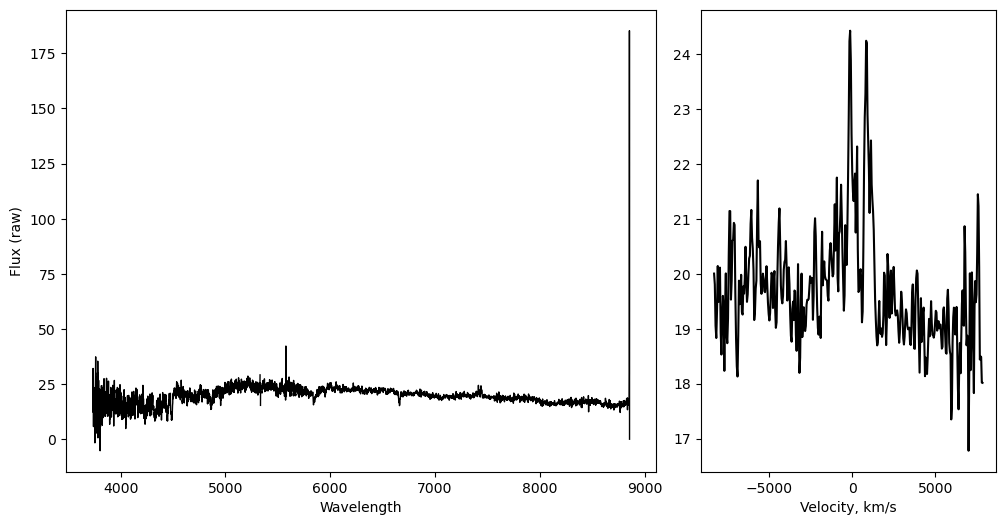

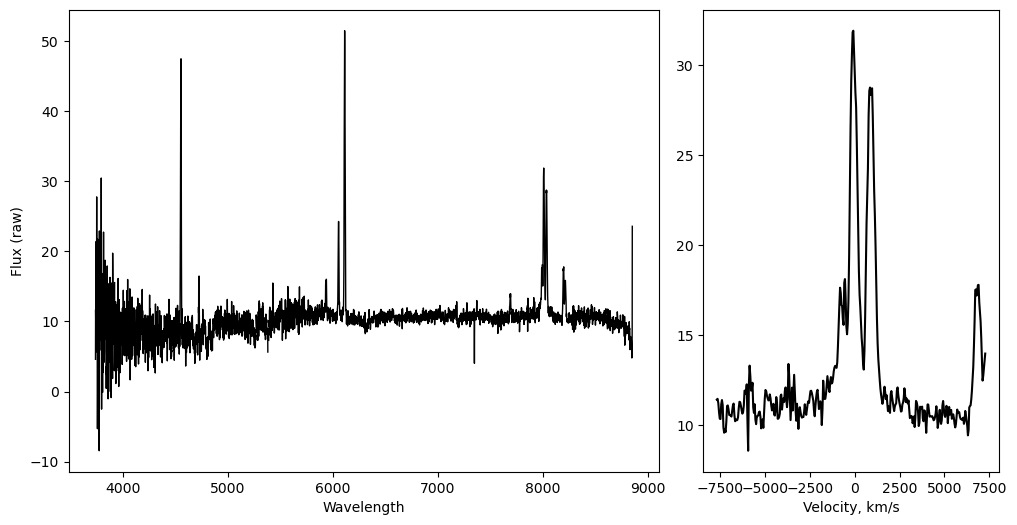

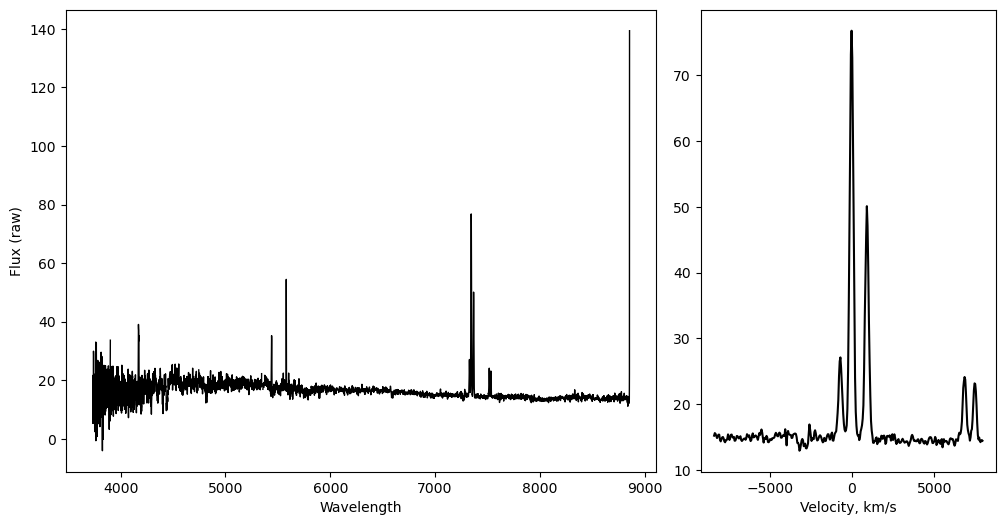

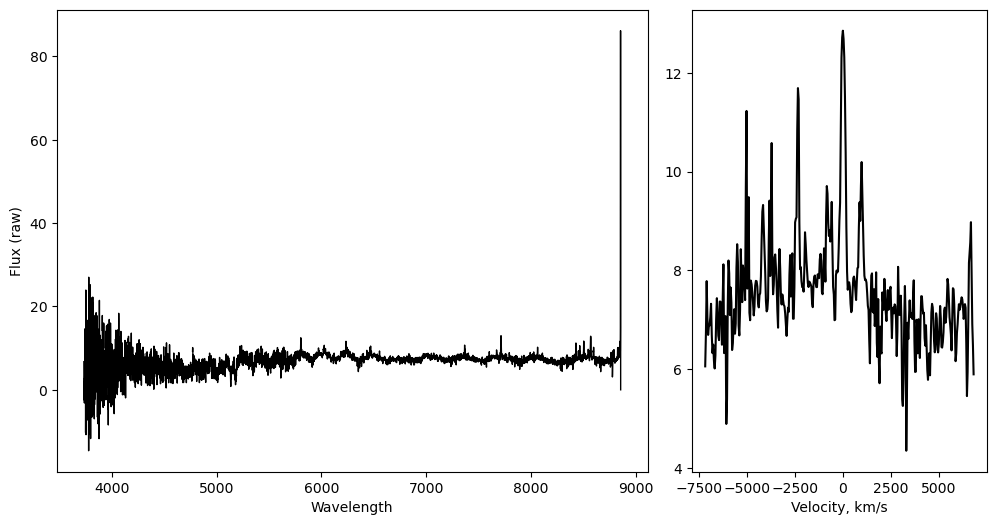

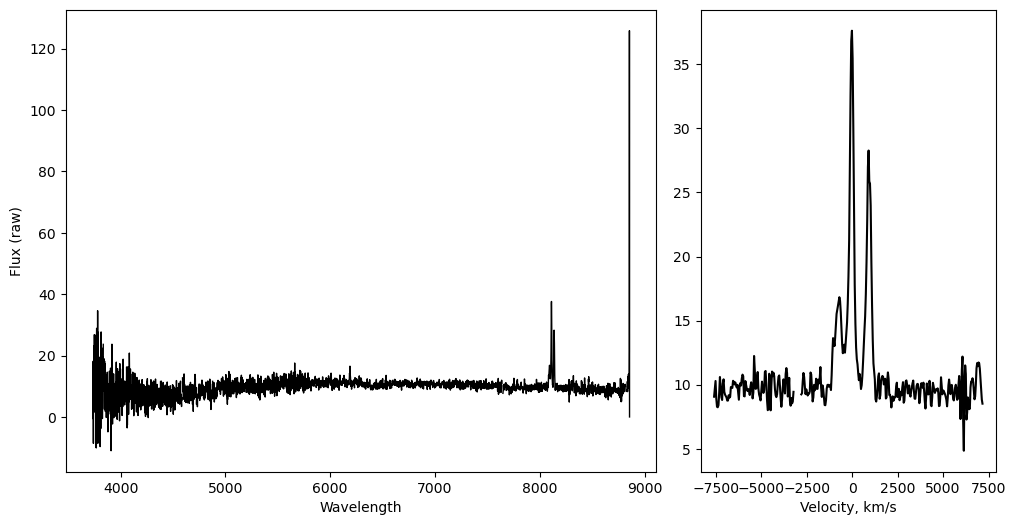

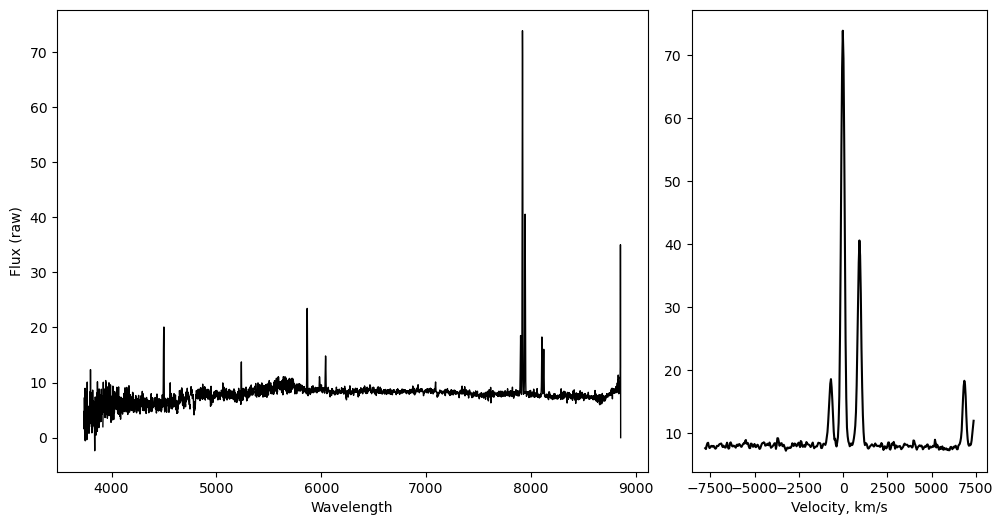

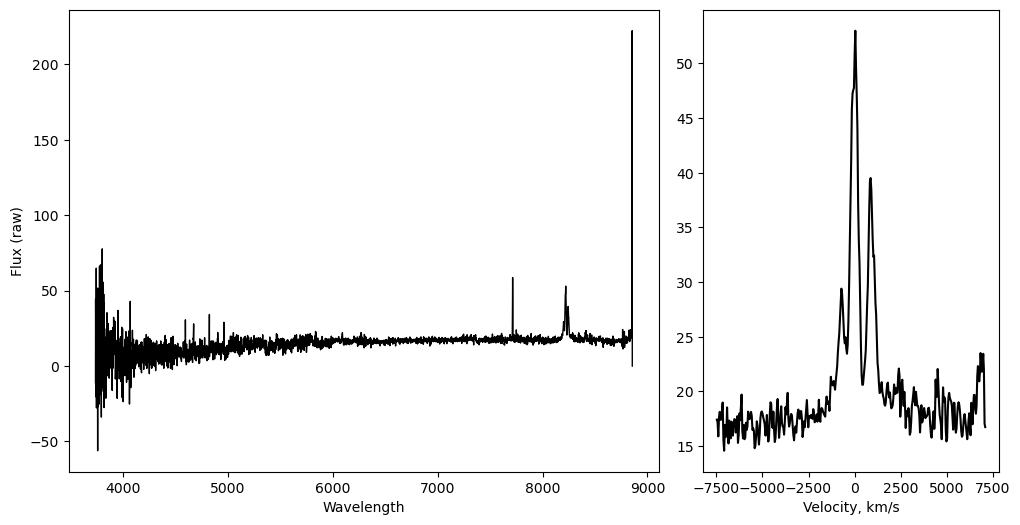

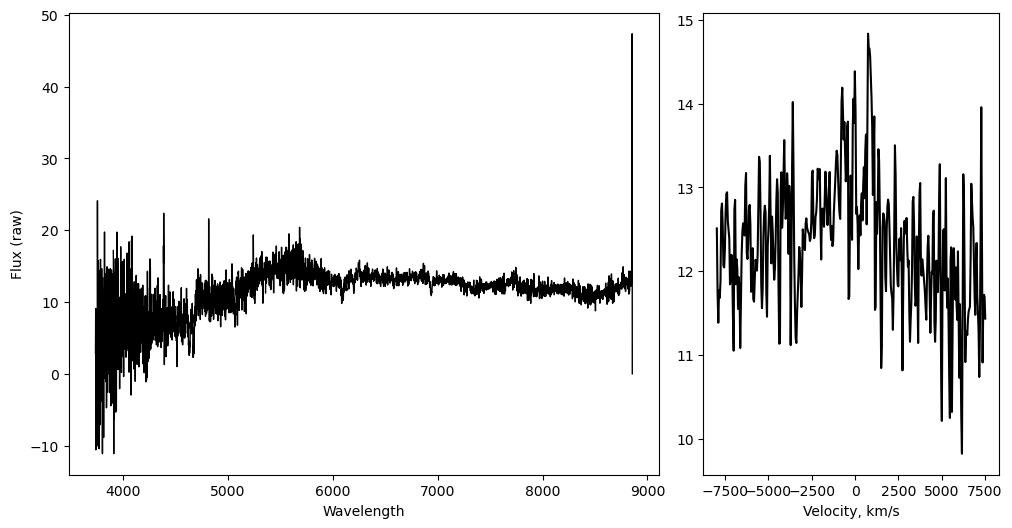

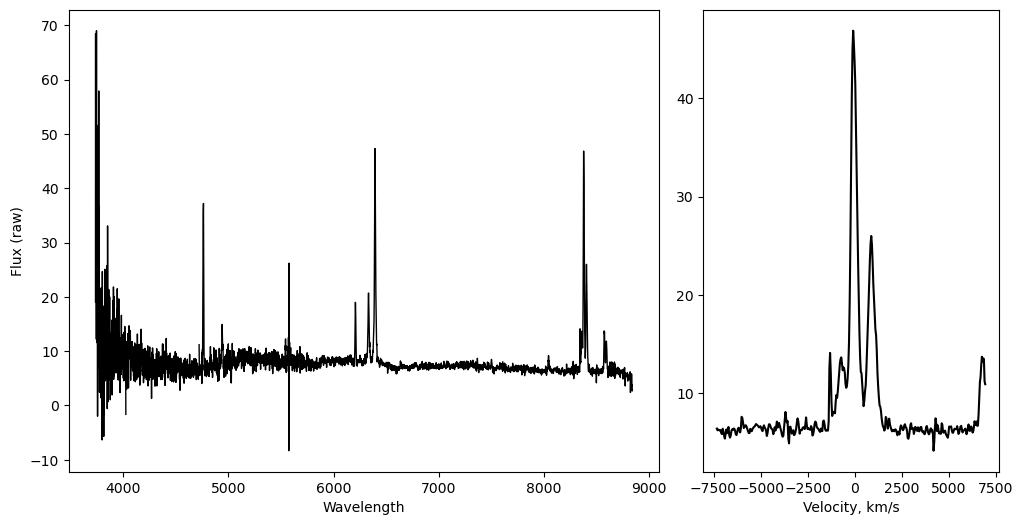

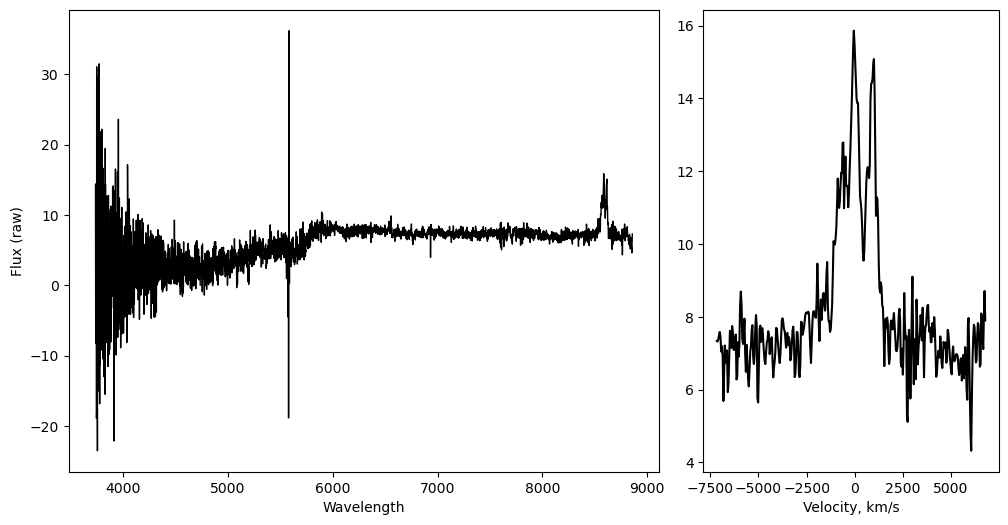

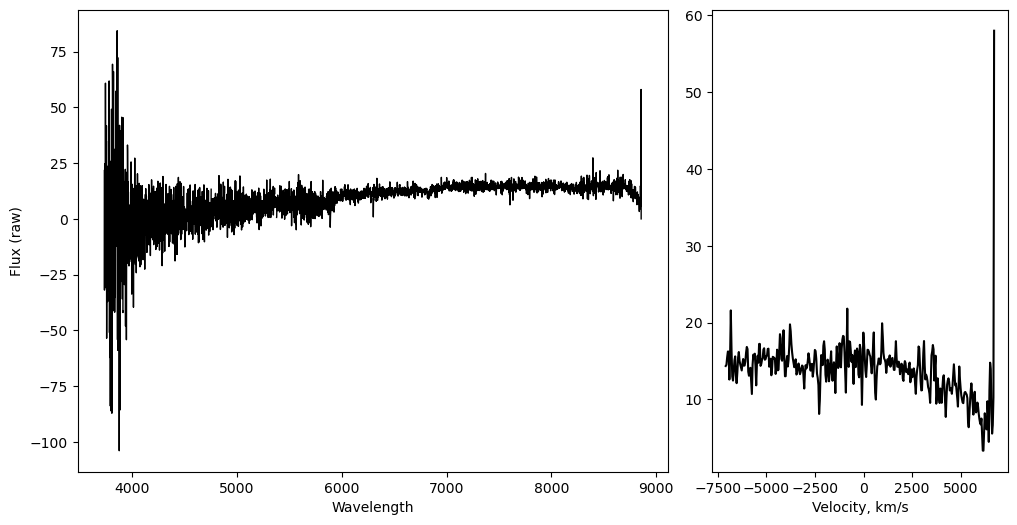

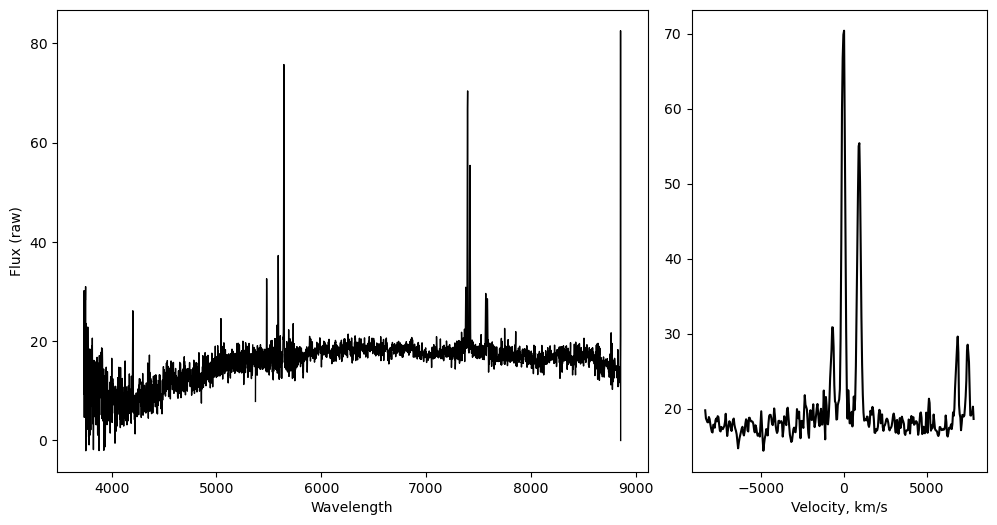

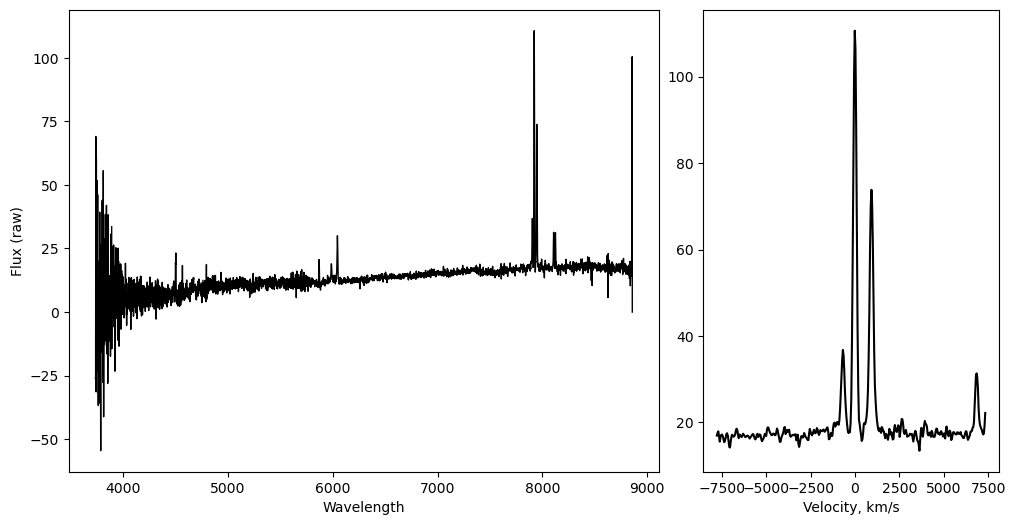

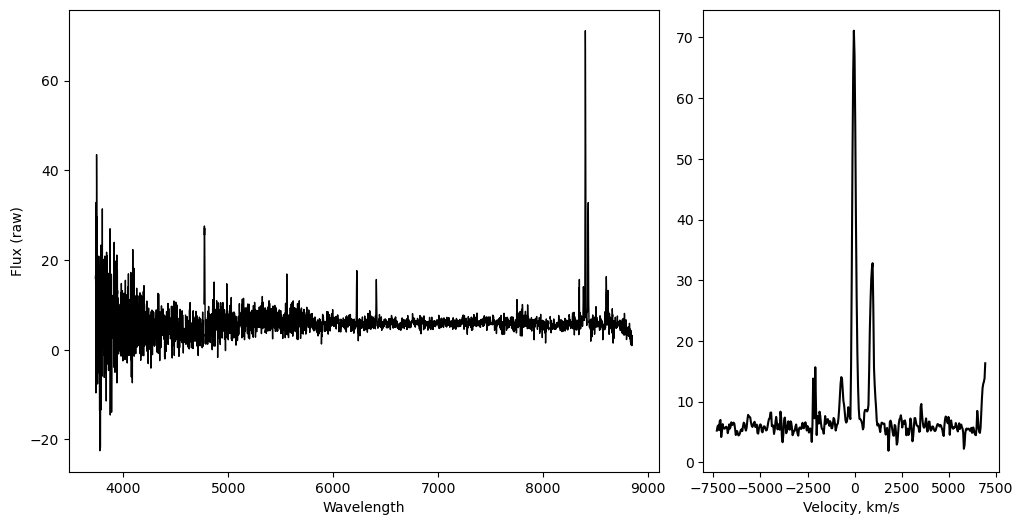

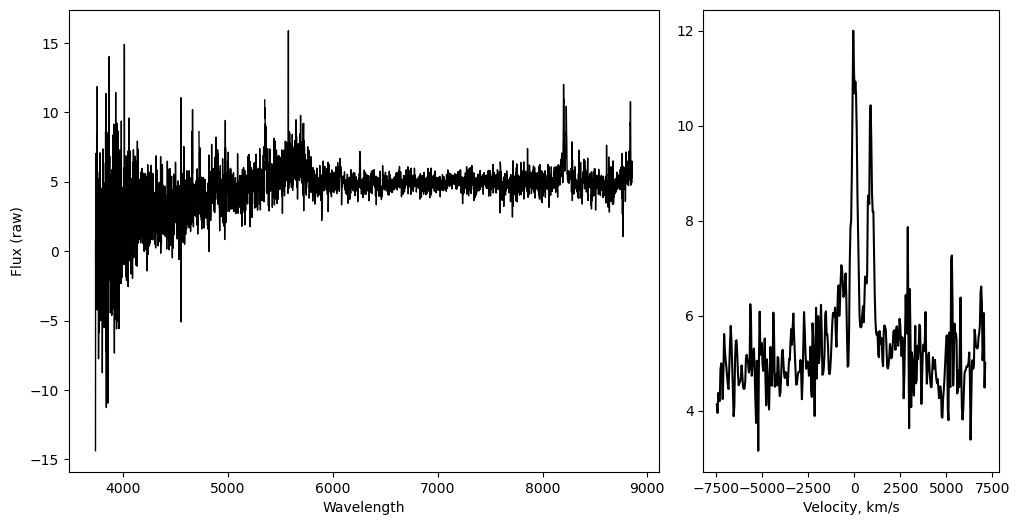

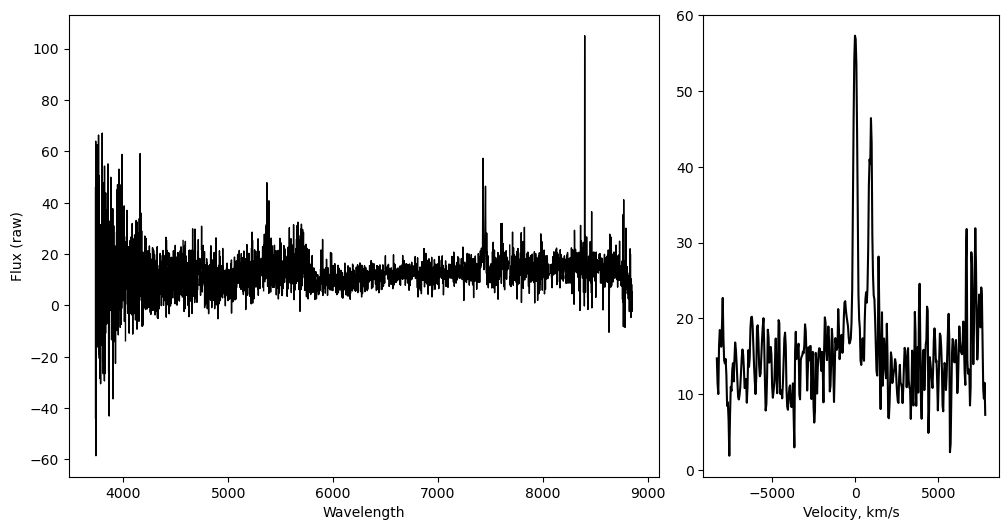

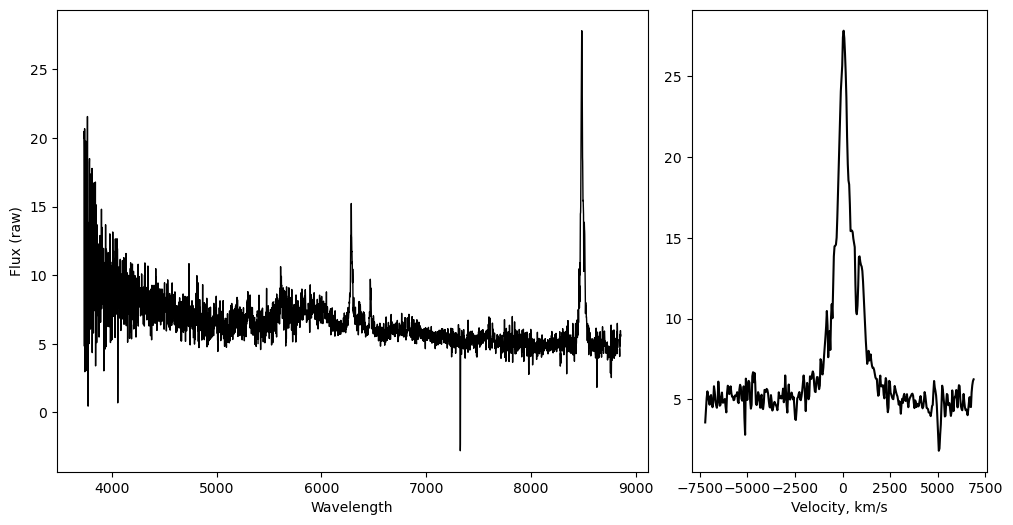

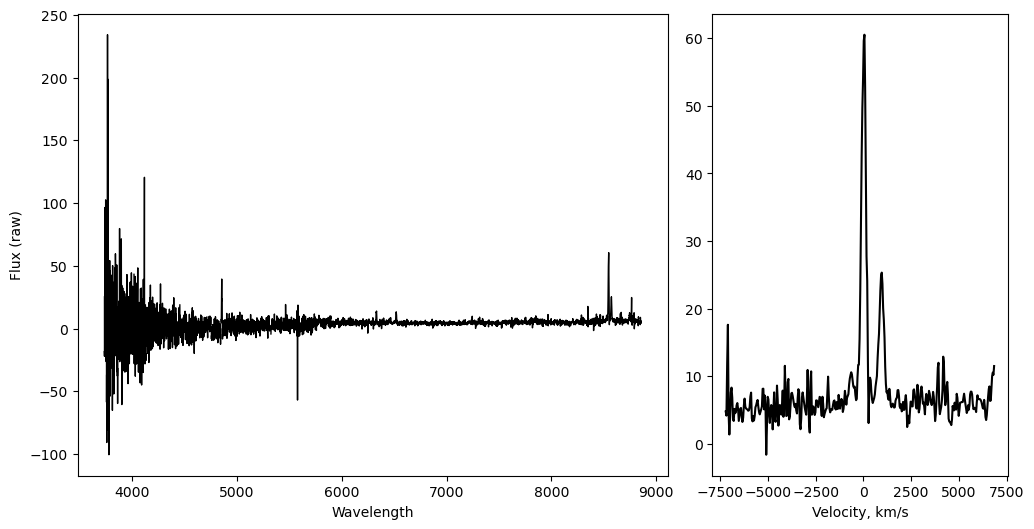

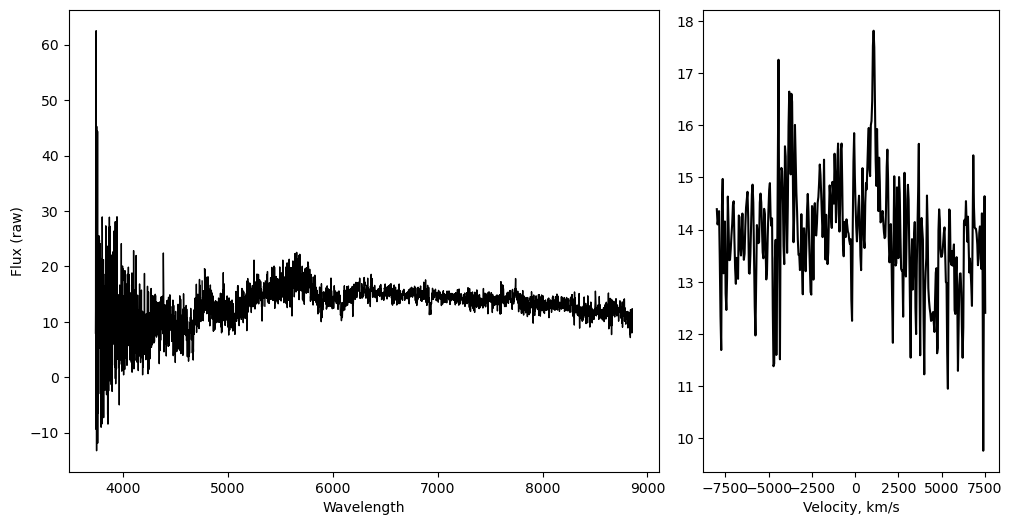

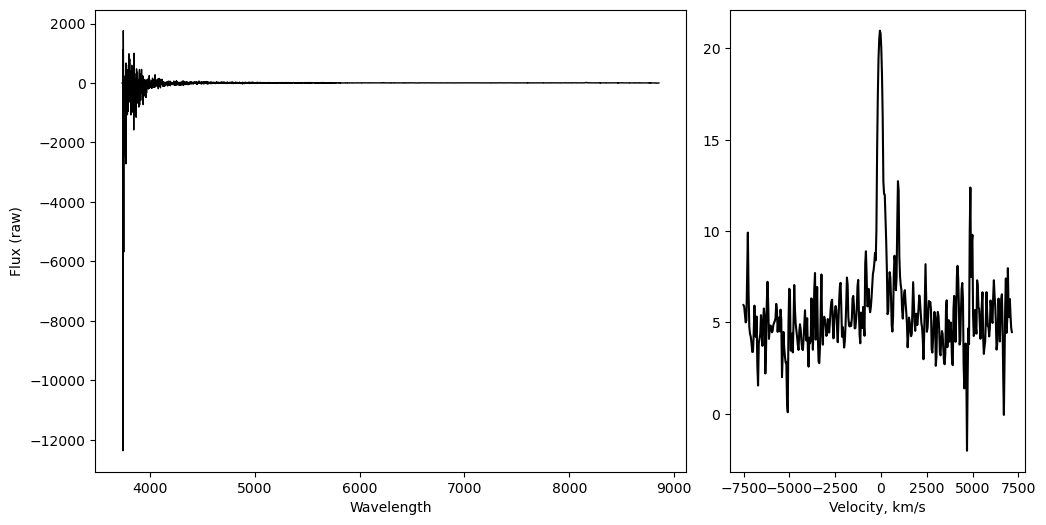

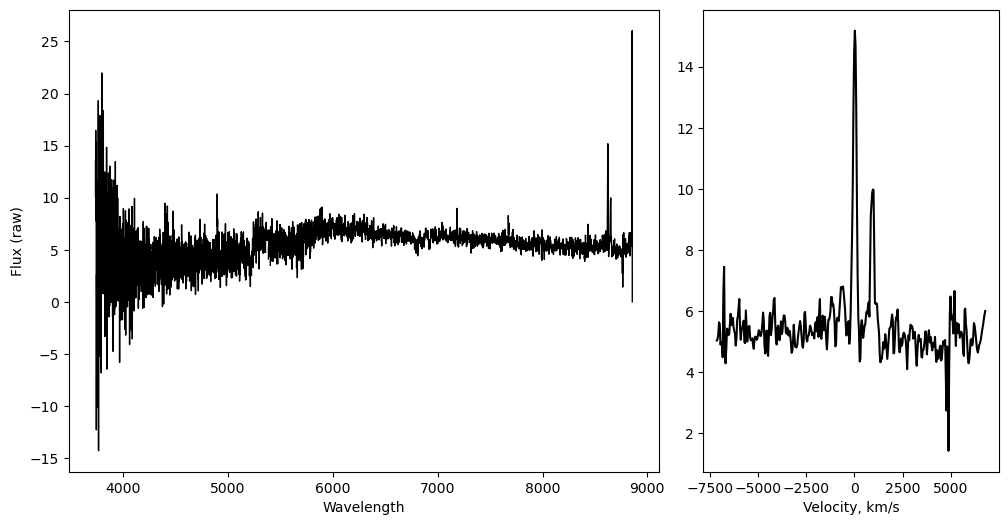

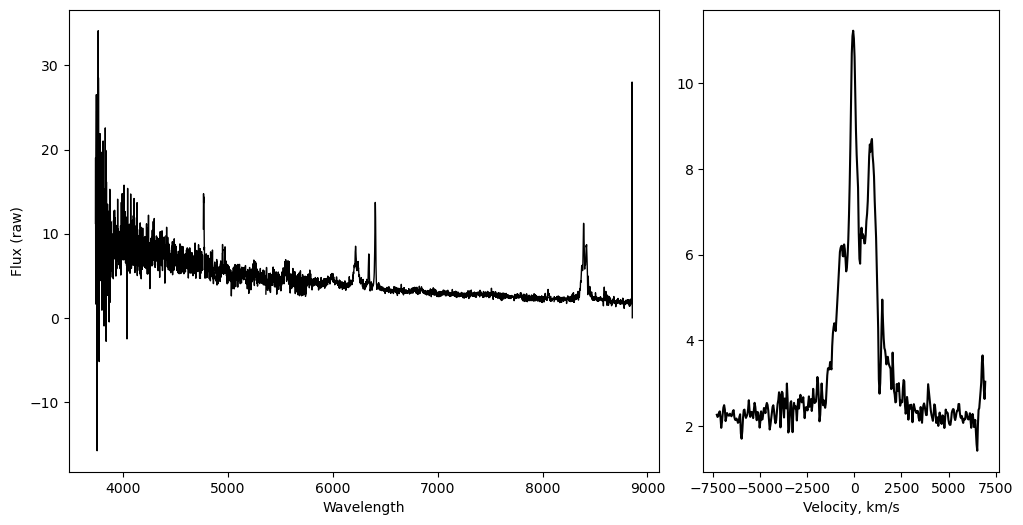

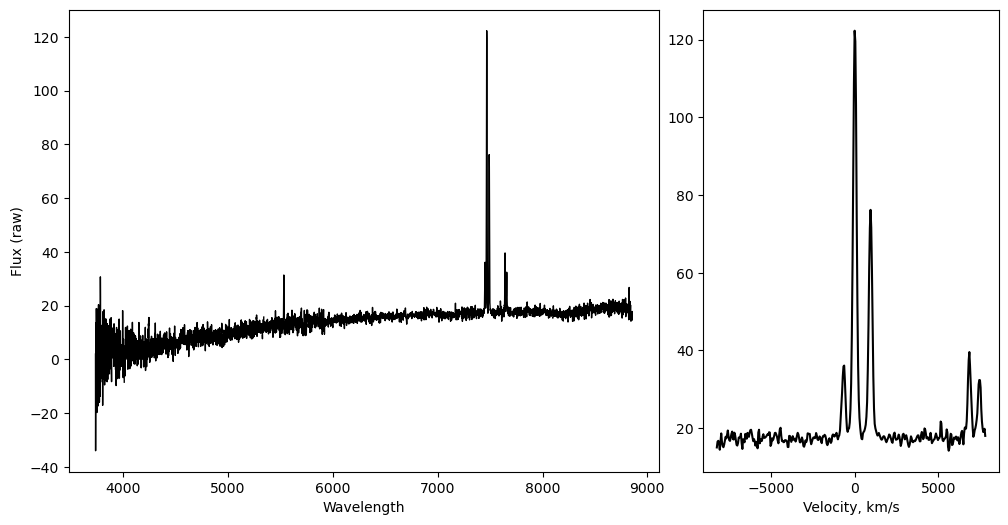

In [7]:
path_to_store_images = r'E:\databases\SDSS\GAMA_SPECTRA_FIT_IMAGES'
os.chdir(r'E:\databases\SDSS\GAMA_SPECTRA_FIT_IMAGES')
path_to_fits = r'E:\databases\SDSS\GAMA_SPECTRA_FIT'
for file in os.listdir(path_to_fits):
    plotter_extractor_gama(path_to_fits + '/' + file, file[:-4]+'.png')